In [18]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [19]:
# reading CSV through pandas
df = pd.read_csv('cleaned_data.csv')

# displaying head of Dataframe
df.head()

Date   Age Sex BirthYearClass  BodyweightKg  Squat1Kg  Squat2Kg  \
0  2018-11-10  43.5   F          40-49        114.65      70.0      80.0   
1  2018-11-10  24.5   F          24-39         58.95     102.5     110.0   
2  2018-11-10  24.5   F          24-39         71.00     110.0     117.5   
3  2018-11-10  30.5   F          24-39         97.15     150.0     165.0   
4  2018-11-10  43.5   F          40-49        114.65      70.0      80.0   

   Squat3Kg  Best3SquatKg  Bench1Kg  ...  Best3BenchKg  Deadlift1Kg  \
0      92.5          92.5      65.0  ...          82.5        110.0   
1     115.0         115.0      57.5  ...          62.5        127.5   
2     122.5         122.5      67.5  ...          75.0        137.5   
3     172.5         172.5      65.0  ...          77.5        165.0   
4      92.5          92.5      65.0  ...          82.5        110.0   

   Deadlift2Kg  Deadlift3Kg  Best3DeadliftKg  TotalKg  Place    Dots   Wilks  \
0        127.5        140.0            140.0    315.0      1  256.19  254.00   
1        135.0        142.5            142.5    320.0      2  358.73  361.69   
2        147.5        155.0            155.0    352.5      3  353.66  347.30   
3        175.0        187.5            187.5    437.5      1  377.64  367.52   
4        127.5        140.0            140.0    315.0      2  256.19  254.00   

   Glossbrenner  
0        215.78  
1        319.65  
2        306.03  
3        316.84  
4        215.78  

[5 rows x 22 columns]

<AxesSubplot: xlabel='WeightClass'>

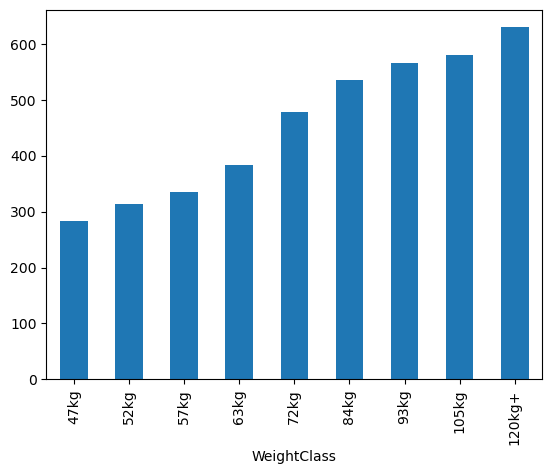

In [21]:
import matplotlib.pyplot as plt

# Create Weight Classes

bins = [0, 52, 57, 63, 72, 84, 93, 105, 120, 1200]
labels = ['47kg', '52kg', '57kg', '63kg', '72kg', '84kg', '93kg', '105kg', '120kg+']
df['WeightClass'] = pd.cut(df['BodyweightKg'], bins=bins, labels=labels)

# group by weight class and get mean total
mean_total_by_weightclass = df.groupby('WeightClass')['TotalKg'].mean()

# plot mean total by weight class
mean_total_by_weightclass.plot(kind='bar')

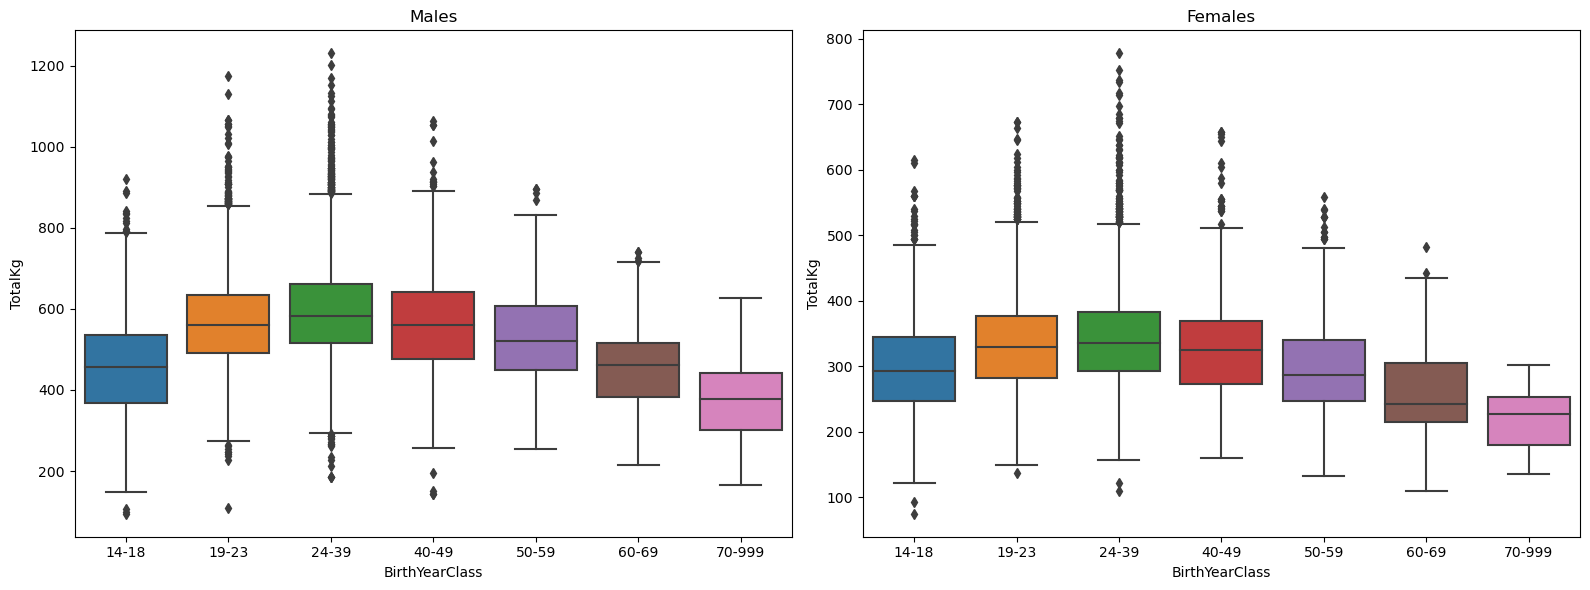

In [22]:
# create ordered categories for birth year class
ordered_birthyear = pd.Categorical(df['BirthYearClass'], 
                                    categories=['14-18', '19-23', '24-39', '40-49', '50-59', '60-69', '70-999'],
                                    ordered=True)

# create a copy of the dataframe with ordered birth year class
df_ordered = df.copy()
df_ordered['BirthYearClass'] = ordered_birthyear
df_ordered = df_ordered.sort_values(by='BirthYearClass')

# create separate plots for males and females
male_df = df_ordered[df_ordered['Sex'] == 'M']
female_df = df_ordered[df_ordered['Sex'] == 'F']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# plot for males
sns.boxplot(x='BirthYearClass', y='TotalKg', data=male_df, ax=ax1)
ax1.set_title('Males')

# plot for females
sns.boxplot(x='BirthYearClass', y='TotalKg', data=female_df, ax=ax2)
ax2.set_title('Females')

plt.tight_layout()
plt.show()

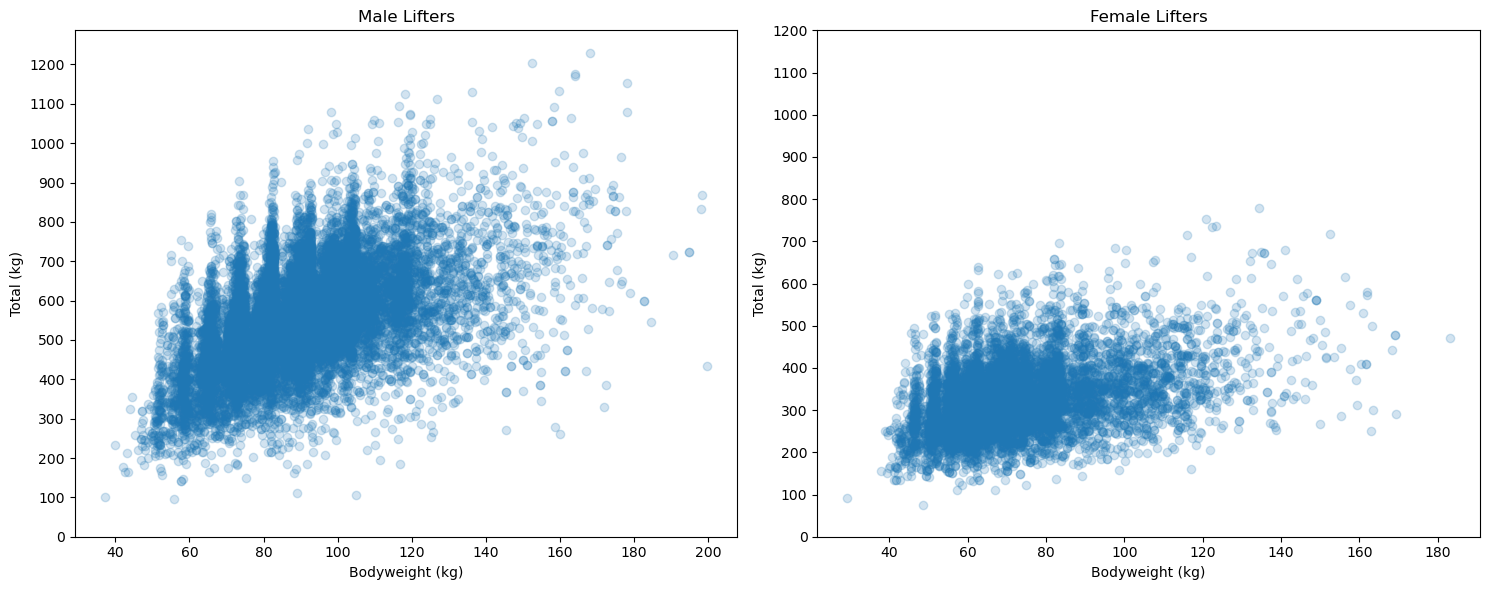

In [23]:
# transparency plot
male_lifters = df[df['Sex'] == 'M']
female_lifters = df[df['Sex'] == 'F']

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Set transparency
alpha = 0.2

# Plot male data
axes[0].scatter(male_lifters['BodyweightKg'], male_lifters['TotalKg'], alpha=alpha)
axes[0].set_xlabel('Bodyweight (kg)')
axes[0].set_ylabel('Total (kg)')
axes[0].set_title('Male Lifters')

# Plot female data
axes[1].scatter(female_lifters['BodyweightKg'], female_lifters['TotalKg'], alpha=alpha)
axes[1].set_xlabel('Bodyweight (kg)')
axes[1].set_ylabel('Total (kg)')
axes[1].set_title('Female Lifters')

y_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
axes[0].set_yticks(y_ticks)
axes[1].set_yticks(y_ticks)

plt.tight_layout()
plt.show()

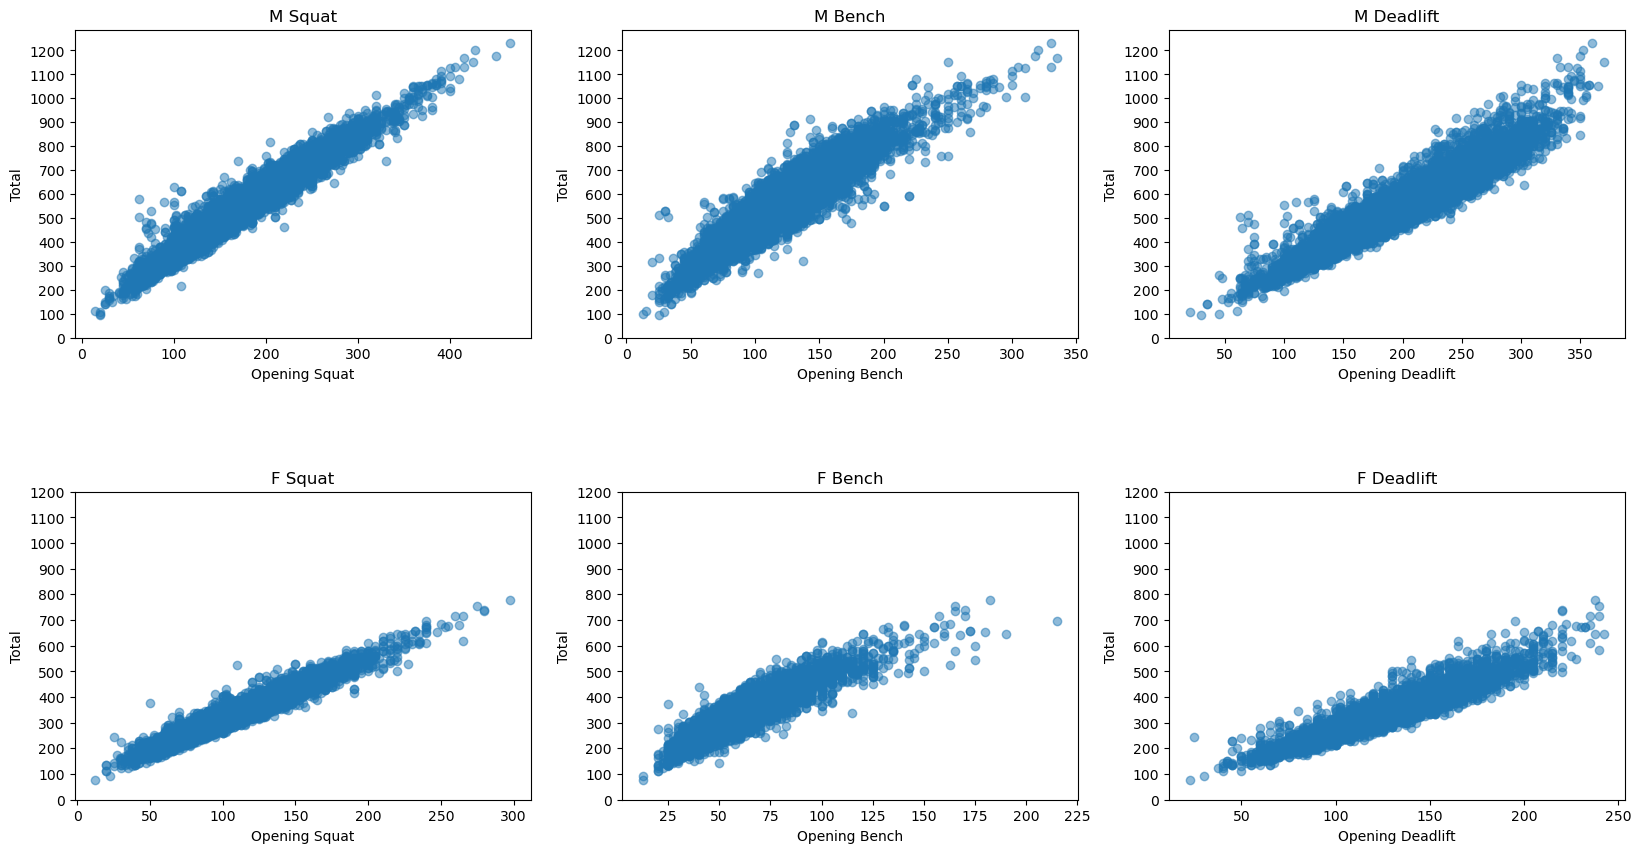

In [24]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)
y_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

for i, sex in enumerate(['M', 'F']):
    df_sex = df[df['Sex'] == sex]
    for j, lift in enumerate(['Squat', 'Bench', 'Deadlift']):
        col_lift = lift + '1Kg'
        col_total = 'TotalKg'
        axs[i, j].scatter(df_sex[col_lift], df_sex[col_total], alpha=0.5)
        axs[i, j].set_title(sex + ' ' + lift)
        axs[i, j].set_xlabel('Opening ' + lift)
        axs[i, j].set_ylabel('Total')
        axs[i, j].set_yticks(y_ticks)
plt.show()

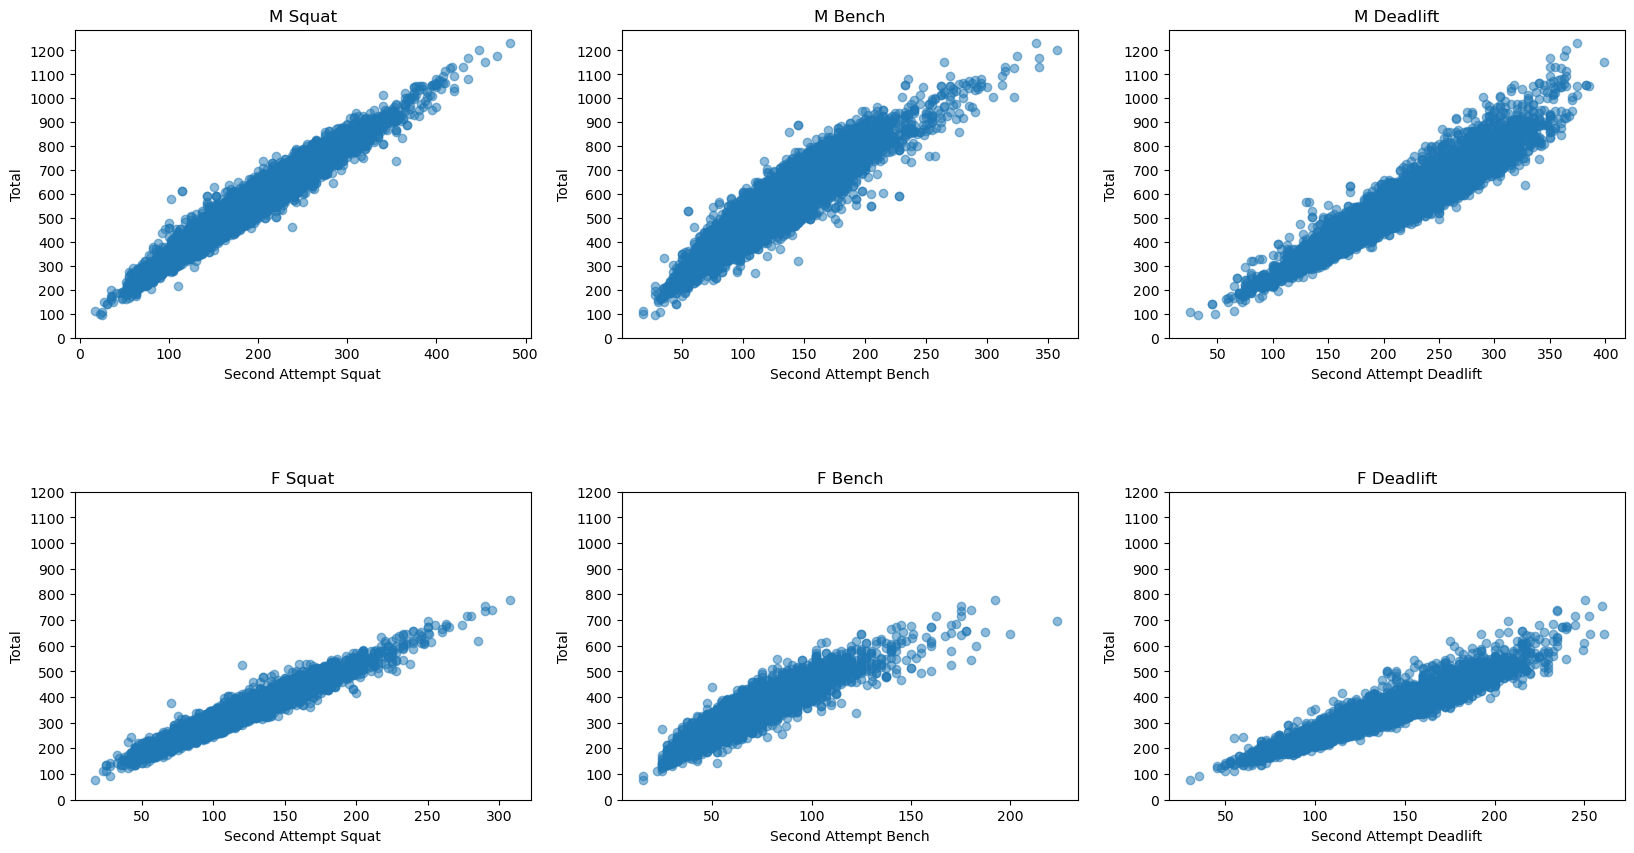

In [25]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)
y_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

for i, sex in enumerate(['M', 'F']):
    df_sex = df[df['Sex'] == sex]
    for j, lift in enumerate(['Squat', 'Bench', 'Deadlift']):
        col_lift = lift + '2Kg'
        col_total = 'TotalKg'
        axs[i, j].scatter(df_sex[col_lift], df_sex[col_total], alpha=0.5)
        axs[i, j].set_title(sex + ' ' + lift)
        axs[i, j].set_xlabel('Second Attempt ' + lift)
        axs[i, j].set_ylabel('Total')
        axs[i, j].set_yticks(y_ticks)
plt.show()

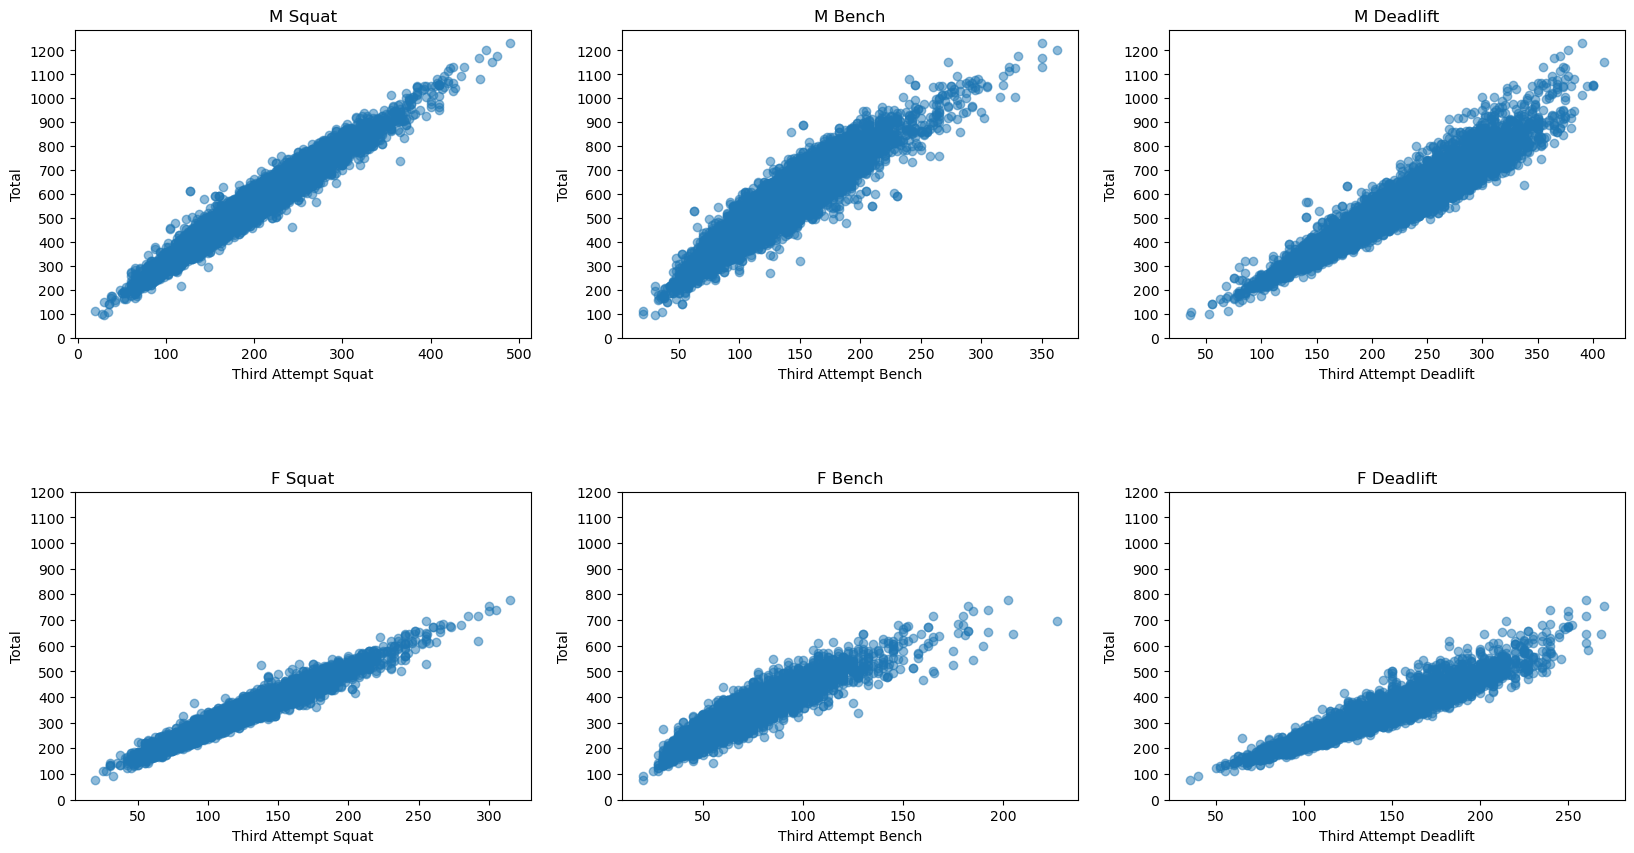

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)
y_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

for i, sex in enumerate(['M', 'F']):
    df_sex = df[df['Sex'] == sex]
    for j, lift in enumerate(['Squat', 'Bench', 'Deadlift']):
        col_lift = lift + '3Kg'
        col_total = 'TotalKg'
        axs[i, j].scatter(df_sex[col_lift], df_sex[col_total], alpha=0.5)
        axs[i, j].set_title(sex + ' ' + lift)
        axs[i, j].set_xlabel('Third Attempt ' + lift)
        axs[i, j].set_ylabel('Total')
        axs[i, j].set_yticks(y_ticks)
plt.show()

# Seems that Opening Lifts are a good enough metric. Let's See if Age Plays A Role in the Linear Nature

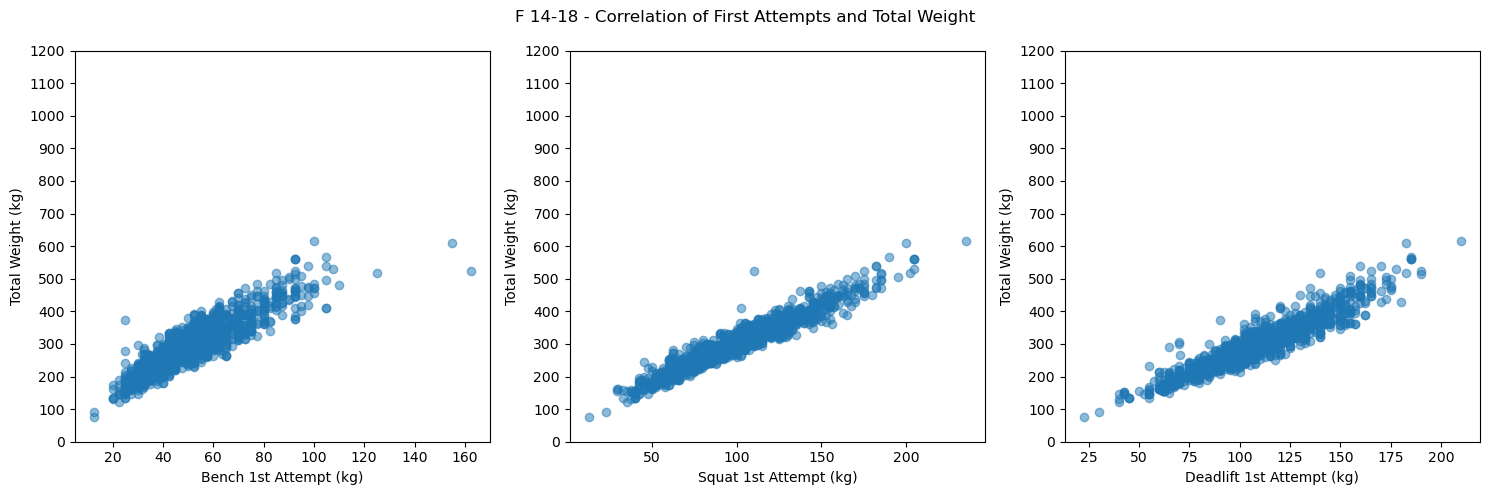

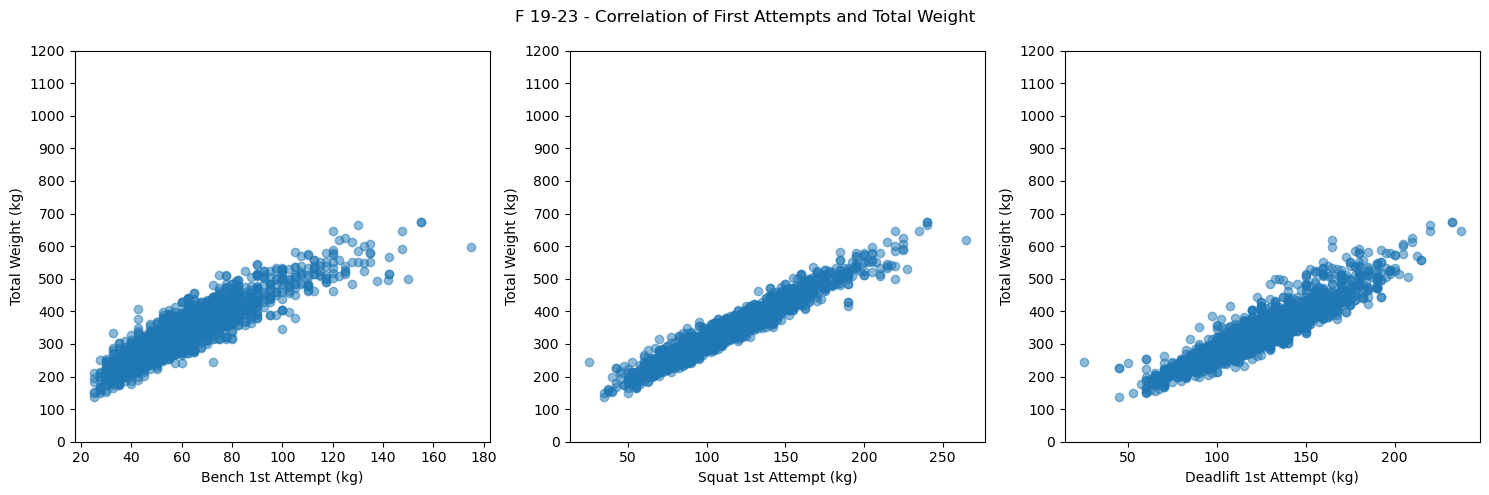

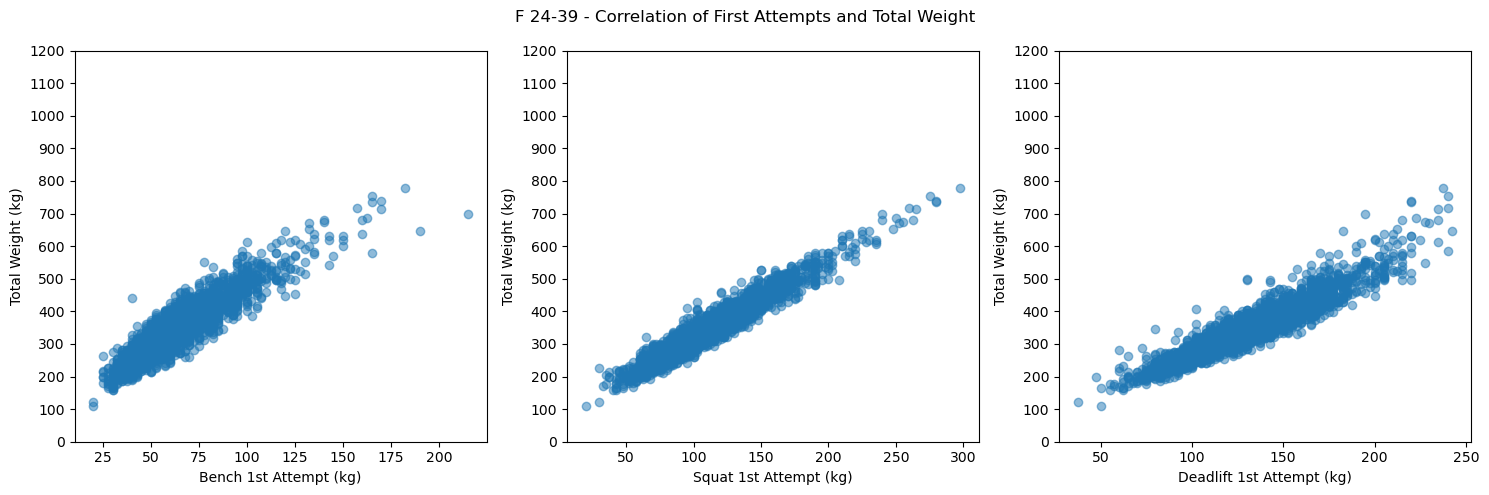

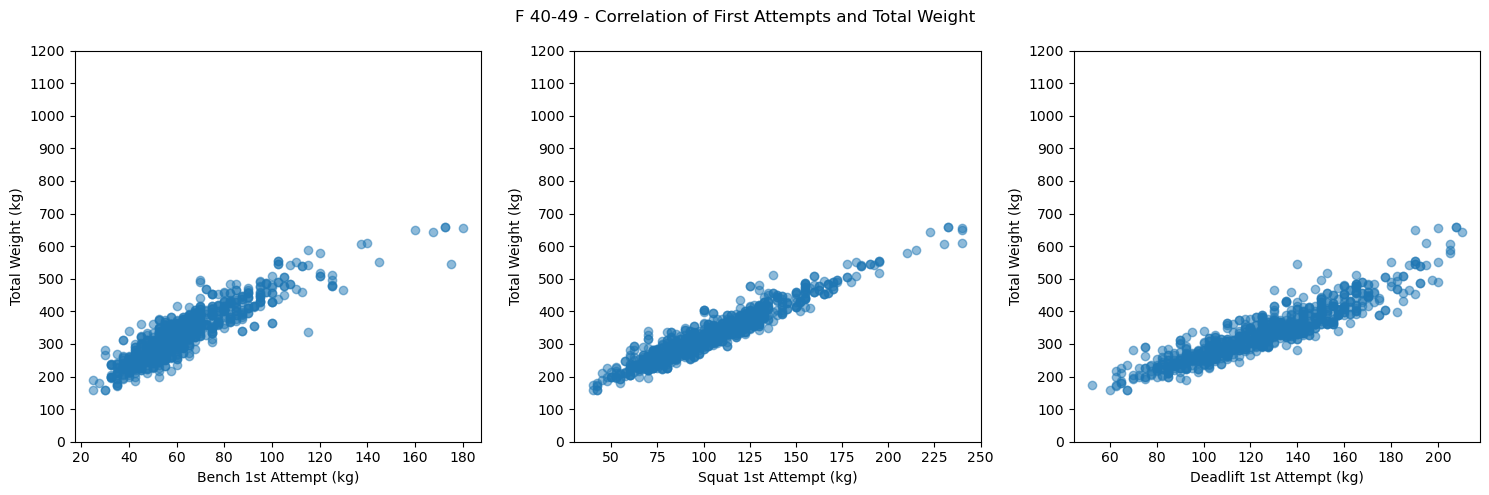

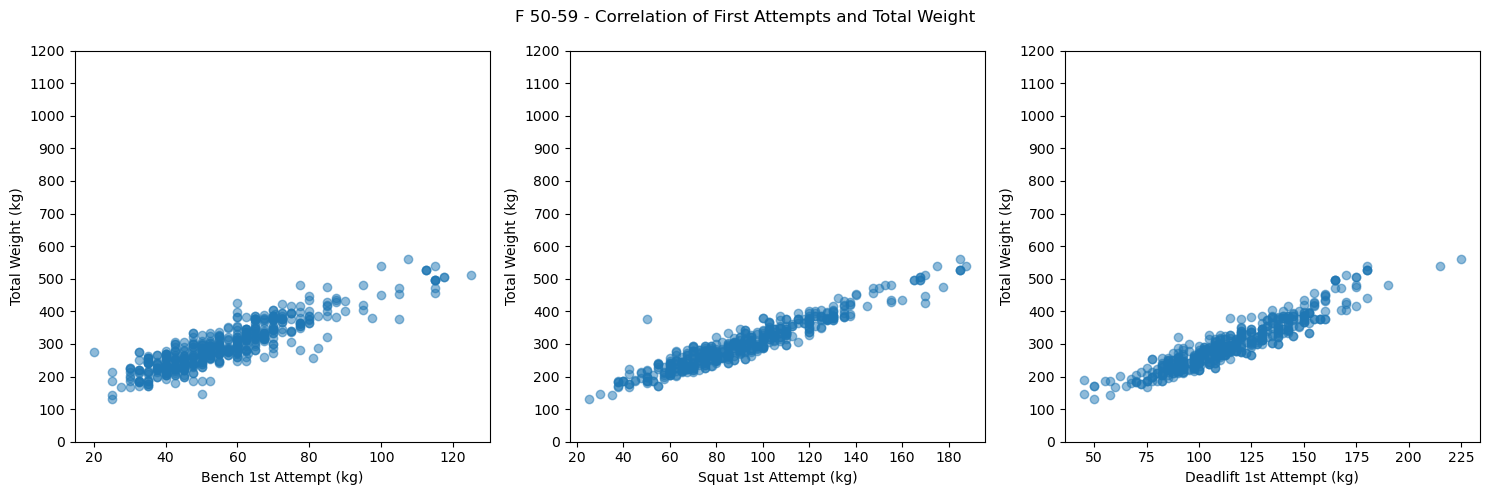

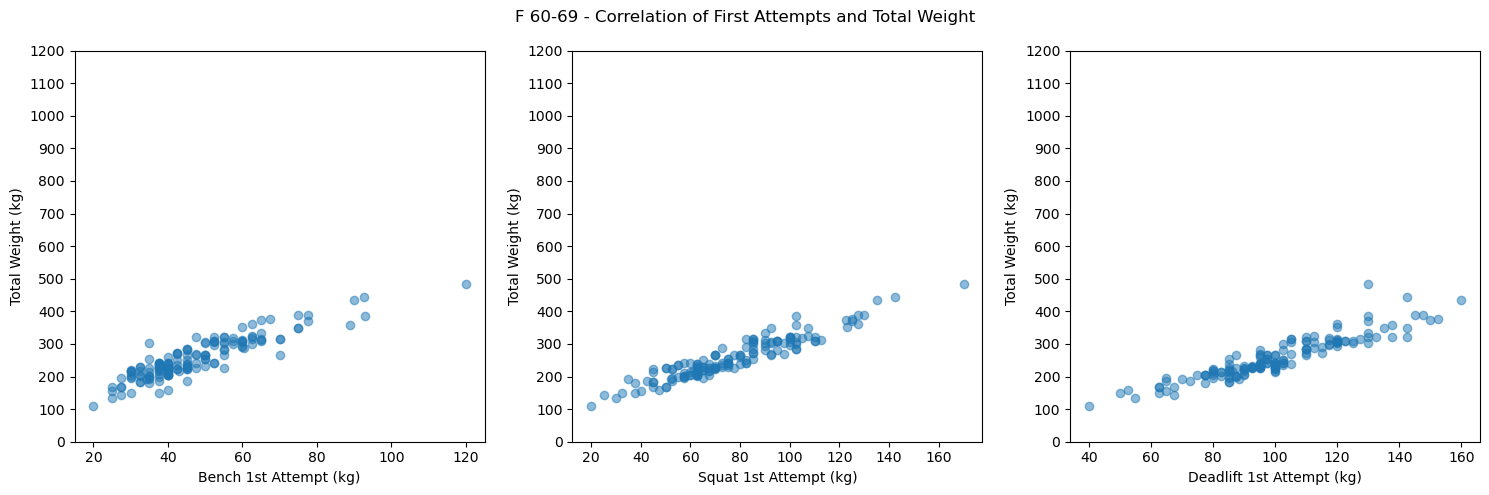

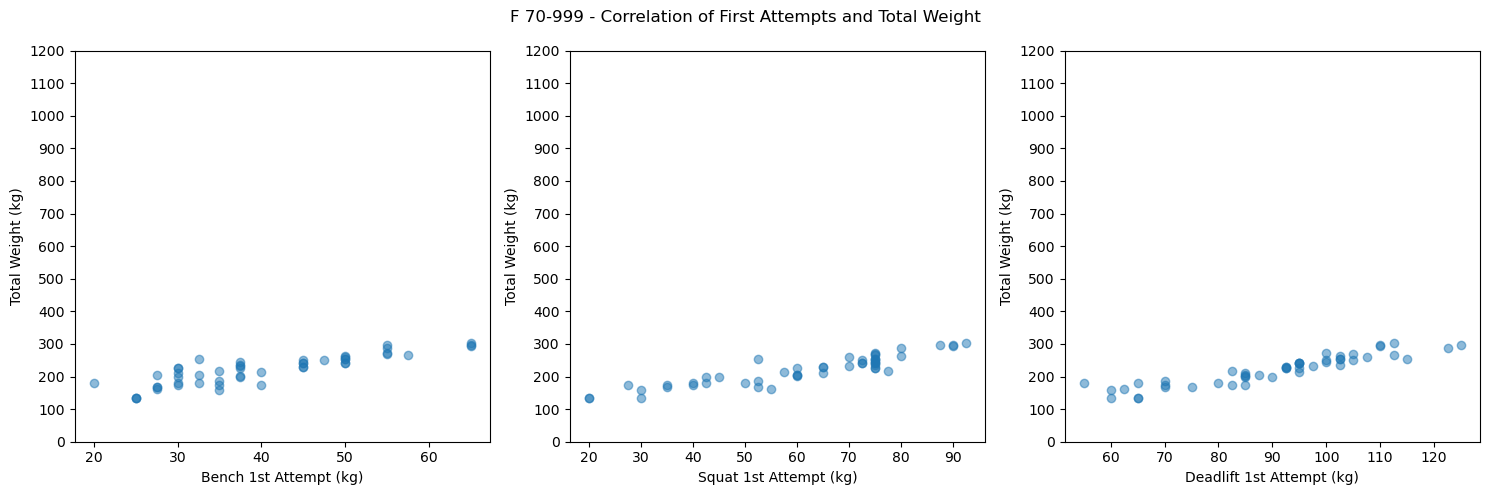

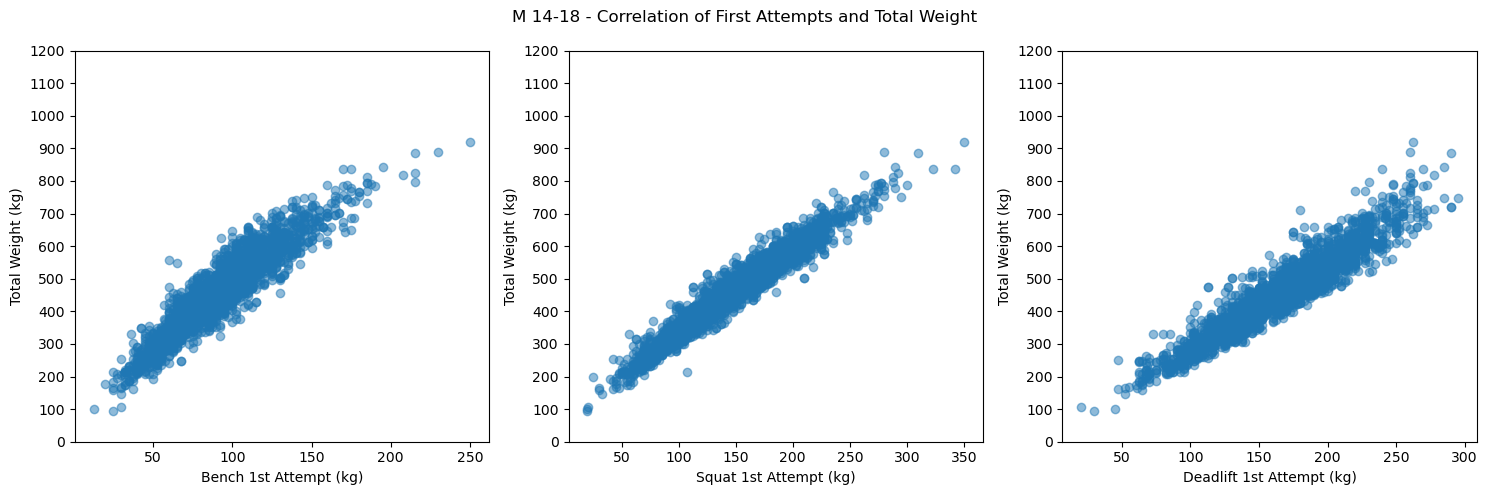

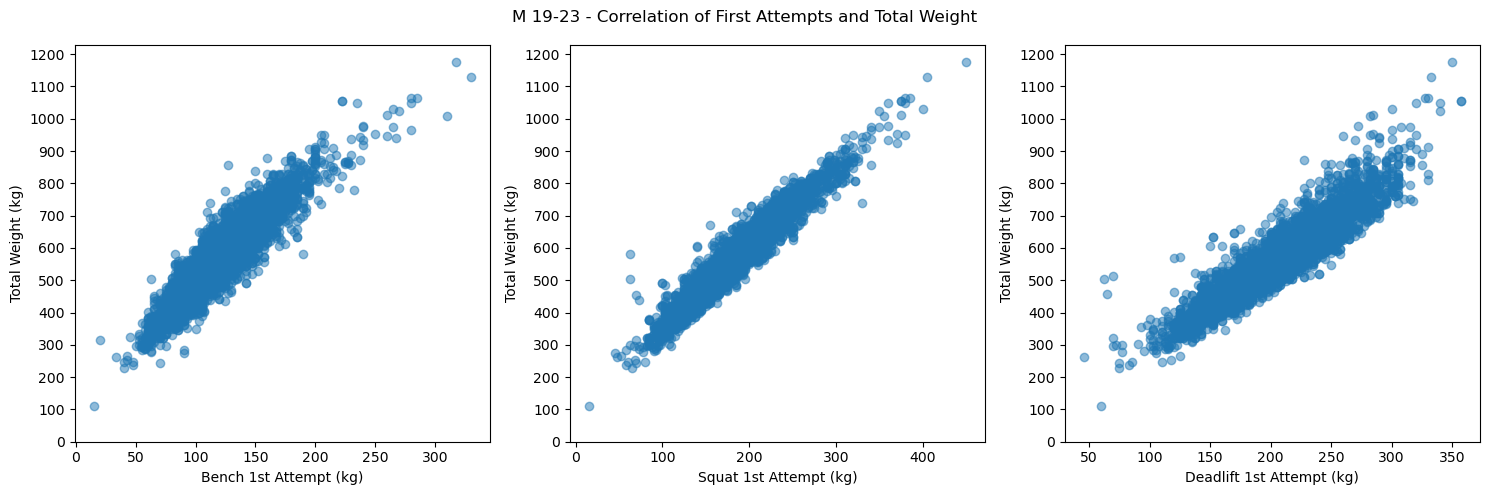

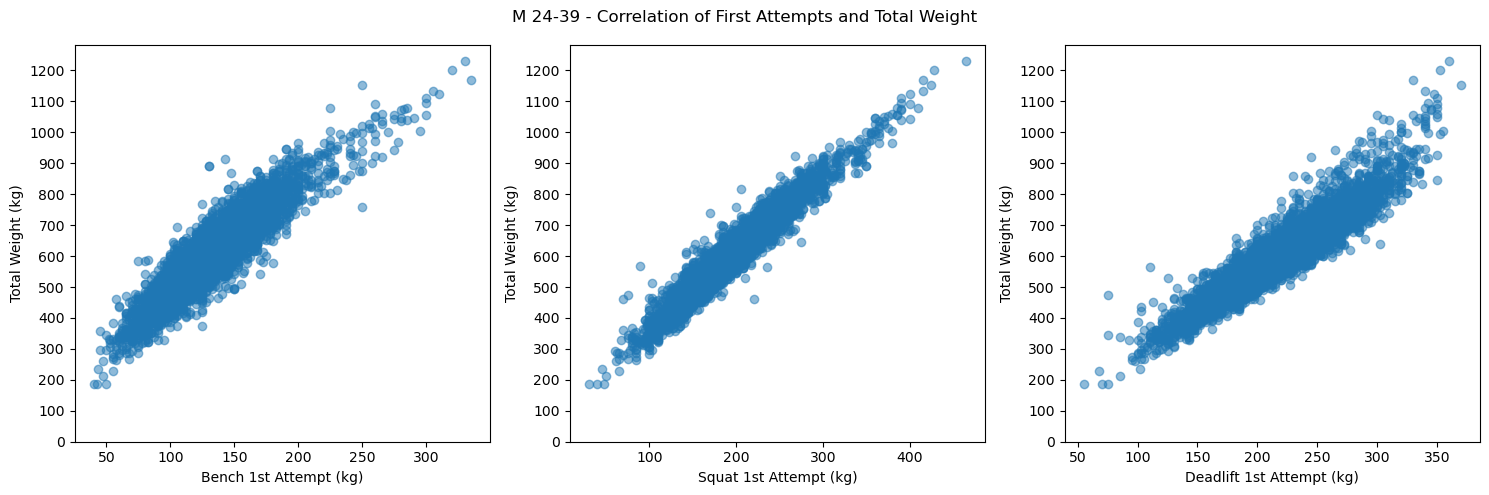

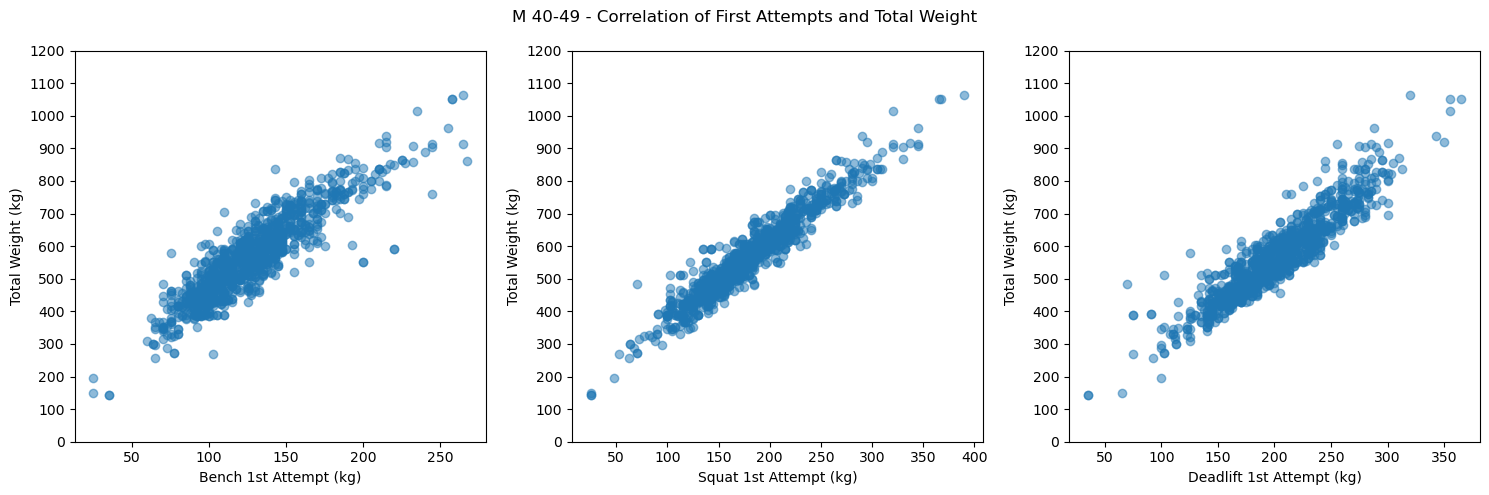

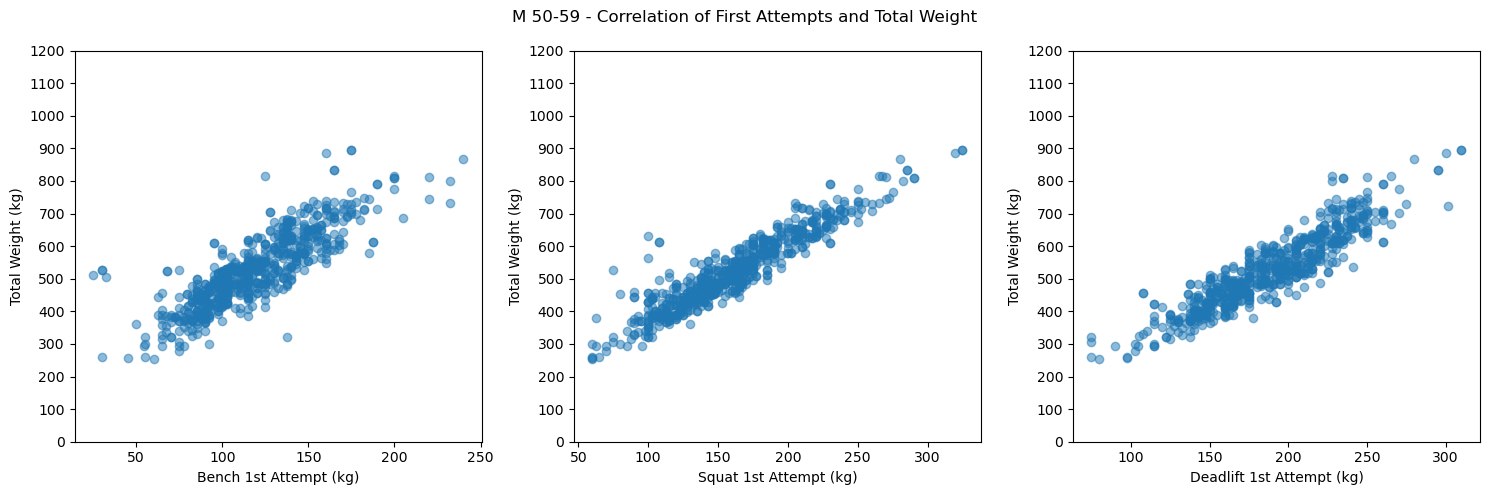

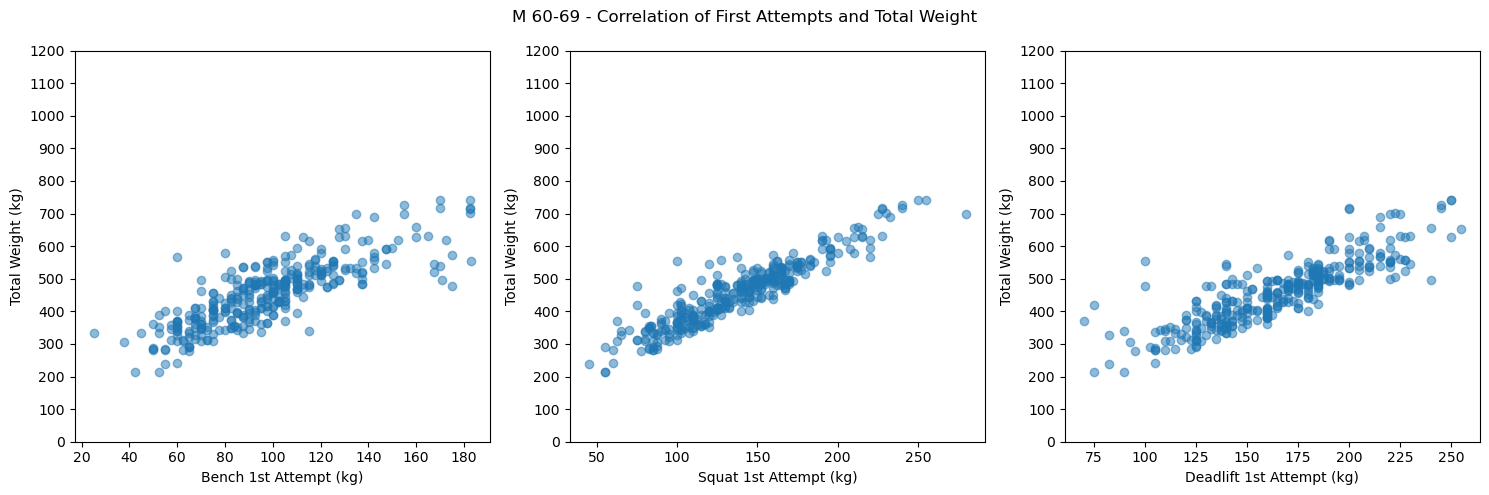

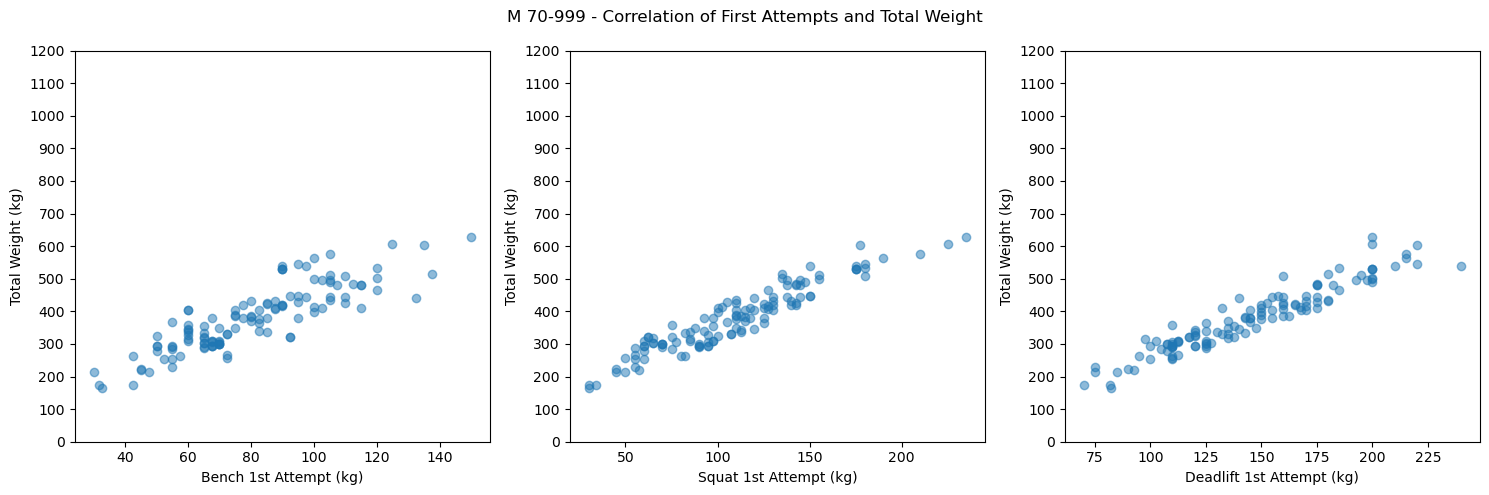

In [ ]:
# group by sex and birth year class
grouped = df.groupby(['Sex', 'BirthYearClass'])
y_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

# iterate over groups and plot correlations
for i, (group, data) in enumerate(grouped):
    sex, birthyearclass = group
    
    # get the middle of each birth year class
    birthyearclass_mid = [int((int(x.split("-")[0]) + int(x.split("-")[1]))/2) for x in data['BirthYearClass']]
    
    # plot correlations
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    
    axs[0].scatter(data['Bench1Kg'], data['TotalKg'], alpha=0.5)
    axs[0].set_xlabel('Bench 1st Attempt (kg)')
    axs[0].set_ylabel('Total Weight (kg)')
    
    axs[1].scatter(data['Squat1Kg'], data['TotalKg'], alpha=0.5)
    axs[1].set_xlabel('Squat 1st Attempt (kg)')
    axs[1].set_ylabel('Total Weight (kg)')
    
    axs[2].scatter(data['Deadlift1Kg'], data['TotalKg'], alpha=0.5)
    axs[2].set_xlabel('Deadlift 1st Attempt (kg)')
    axs[2].set_ylabel('Total Weight (kg)')
    
    axs[0].set_yticks(y_ticks)
    axs[1].set_yticks(y_ticks)
    axs[2].set_yticks(y_ticks)
    
    
    fig.suptitle(f'{sex} {birthyearclass} - Correlation of First Attempts and Total Weight')
    
    plt.tight_layout()
    plt.show()


In [28]:
# Calculate percentage difference for attempts 1 to 2 and 2 to 3
df['Bench12PercentDiff'] = ((df['Bench2Kg'] - df['Bench1Kg']) / df['Bench1Kg']) * 100
df['Bench23PercentDiff'] = ((df['Bench3Kg'] - df['Bench2Kg']) / df['Bench2Kg']) * 100
df['Squat12PercentDiff'] = ((df['Squat2Kg'] - df['Squat1Kg']) / df['Squat1Kg']) * 100
df['Squat23PercentDiff'] = ((df['Squat3Kg'] - df['Squat2Kg']) / df['Squat2Kg']) * 100
df['Deadlift12PercentDiff'] = ((df['Deadlift2Kg'] - df['Deadlift1Kg']) / df['Deadlift1Kg']) * 100
df['Deadlift23PercentDiff'] = ((df['Deadlift3Kg'] - df['Deadlift2Kg']) / df['Deadlift2Kg']) * 100

# Group the data by lift and calculate mean percentage difference for each lift
lift_groups = df.groupby('WeightClass')[['Bench12PercentDiff', 'Bench23PercentDiff', 'Squat12PercentDiff', 'Squat23PercentDiff', 'Deadlift12PercentDiff', 'Deadlift23PercentDiff']]
mean_percent_diff = lift_groups.mean()
mean_percent_diff

Bench12PercentDiff  Bench23PercentDiff  Squat12PercentDiff  \
WeightClass                                                               
47kg                   9.217058            6.686350            8.525675   
52kg                   8.637485            6.005720            7.613078   
57kg                   8.309339            5.893291            7.440370   
63kg                   8.021261            5.614443            7.222643   
72kg                   7.252966            5.068700            6.784184   
84kg                   6.957221            4.861000            6.741862   
93kg                   6.789667            4.866404            6.595476   
105kg                  7.081237            4.910506            6.737796   
120kg+                 6.875221            5.079433            6.754716   

             Squat23PercentDiff  Deadlift12PercentDiff  Deadlift23PercentDiff  
WeightClass                                                                    
47kg                   6.063309               8.412385               6.047253  
52kg                   5.711908               8.041704               5.826675  
57kg                   5.652076               7.760215               5.851623  
63kg                   5.475819               7.480750               5.596313  
72kg                   5.124431               7.141596               5.246906  
84kg                   5.020052               7.114098               5.193180  
93kg                   5.010194               7.029945               5.096721  
105kg                  5.107322               7.068021               5.224477  
120kg+                 5.135136               7.075729               5.154207

# Hard to see differences so let's check out a bar plot

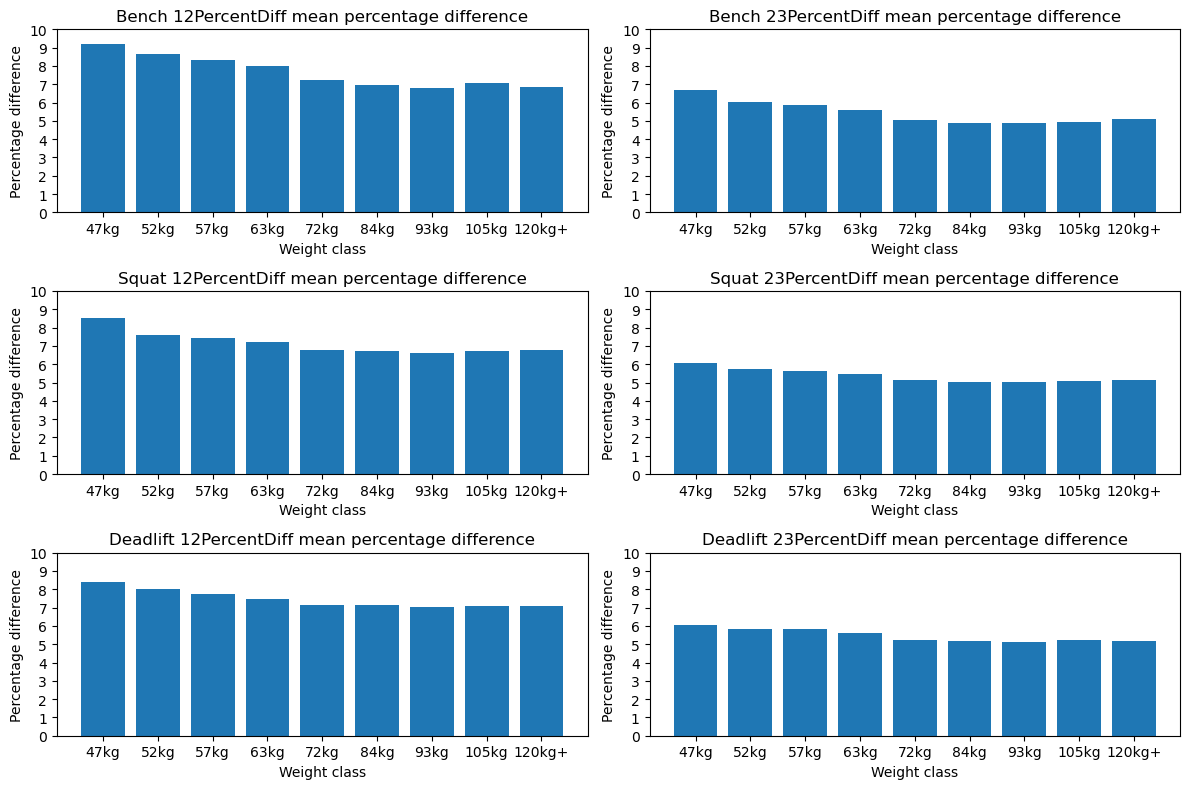

In [29]:
# Create bar plots of mean percentage difference for each lift
lifts = ['Bench', 'Squat', 'Deadlift']
lift_diffs = ['12PercentDiff', '23PercentDiff']
fig, axs = plt.subplots(len(lifts), len(lift_diffs), figsize=(12, 8))
y_ticks = [0,1,2,3,4,5,6,7,8,9,10]
for i, lift in enumerate(lifts):
    for j, diff in enumerate(lift_diffs):
        col_name = f"{lift}{diff}"
        axs[i, j].bar(mean_percent_diff.index, mean_percent_diff[col_name])
        axs[i, j].set_title(f"{lift} {diff} mean percentage difference")
        axs[i, j].set_xlabel('Weight class')
        axs[i, j].set_ylabel('Percentage difference')
        axs[i, j].set_yticks(y_ticks)
fig.tight_layout()
plt.show()

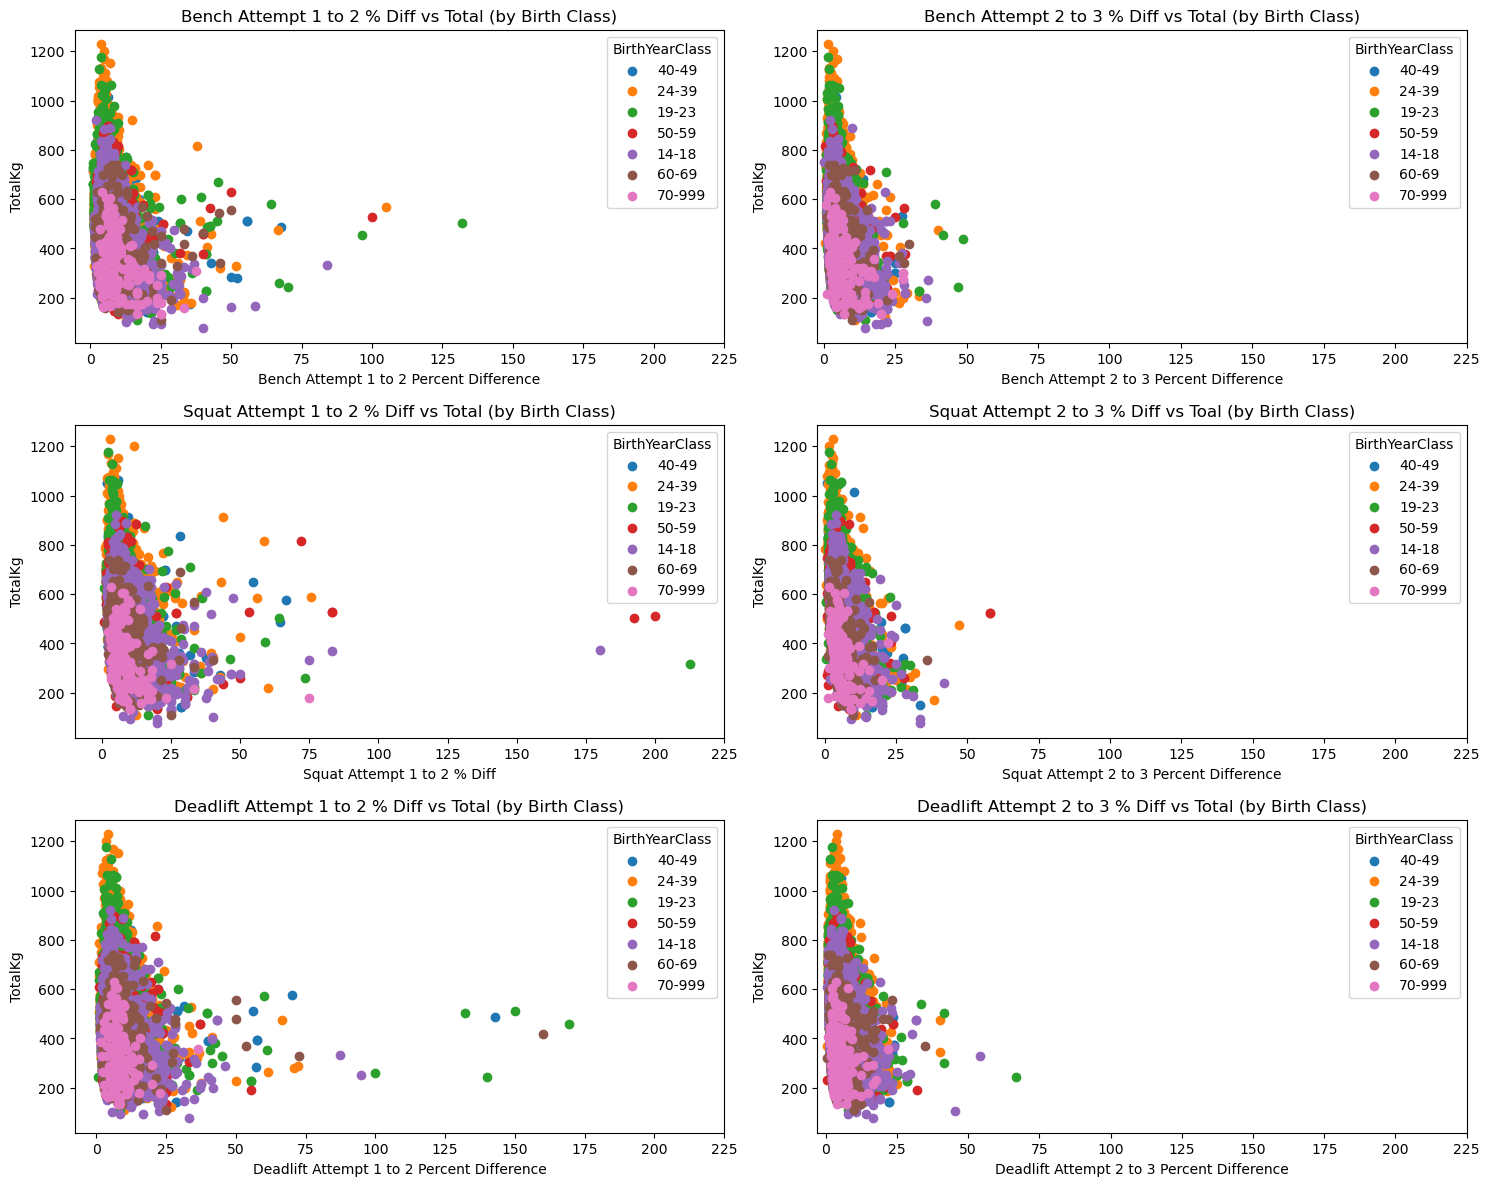

In [55]:
lifts = ['Squat', 'Bench', 'Deadlift']
lift_diff_cols = ['Squat12PercentDiff', 'Squat23PercentDiff', 'Bench12PercentDiff', 'Bench23PercentDiff', 'Deadlift12PercentDiff', 'Deadlift23PercentDiff']
titles = ["Bench Attempt 1 to 2 % Diff vs Total (by Birth Class)",
          "Bench Attempt 2 to 3 % Diff vs Total (by Birth Class)",
          "Squat Attempt 1 to 2 % Diff vs Total (by Birth Class)",
          "Squat Attempt 2 to 3 % Diff vs Toal (by Birth Class)",
          "Deadlift Attempt 1 to 2 % Diff vs Total (by Birth Class)",
          "Deadlift Attempt 2 to 3 % Diff vs Total (by Birth Class)"]
x_titles = ["Bench Attempt 1 to 2 Percent Difference",
           "Bench Attempt 2 to 3 Percent Difference",
           "Squat Attempt 1 to 2 % Diff",
          "Squat Attempt 2 to 3 Percent Difference",
          "Deadlift Attempt 1 to 2 Percent Difference",
          "Deadlift Attempt 2 to 3 Percent Difference"]
total_col = 'TotalKg'
byc_col = 'BirthYearClass'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
fig.subplots_adjust(hspace=2)

for i, lift in enumerate(lifts):
    lift_diff_cols_for_lift = [col for col in lift_diff_cols if lift in col]
    for j, diff_col in enumerate(lift_diff_cols_for_lift):
        # Create a scatter plot of Total vs percent difference, split by birth year class
        ax = axs[i,j]
        for byc in df[byc_col].unique():
            mask = df[byc_col] == byc
            x = df.loc[mask, diff_col]
            y = df.loc[mask, total_col]
            ax.scatter(x, y, label=byc)
        ax.set_xlabel(x_titles[i*2+j])
        ax.set_ylabel(total_col)
        ax.set_title(titles[i*2+j])
        ax.set_xticks(range(0, 226, 25))
        ax.legend(title=byc_col, loc='upper right')
        
plt.tight_layout()
plt.show()

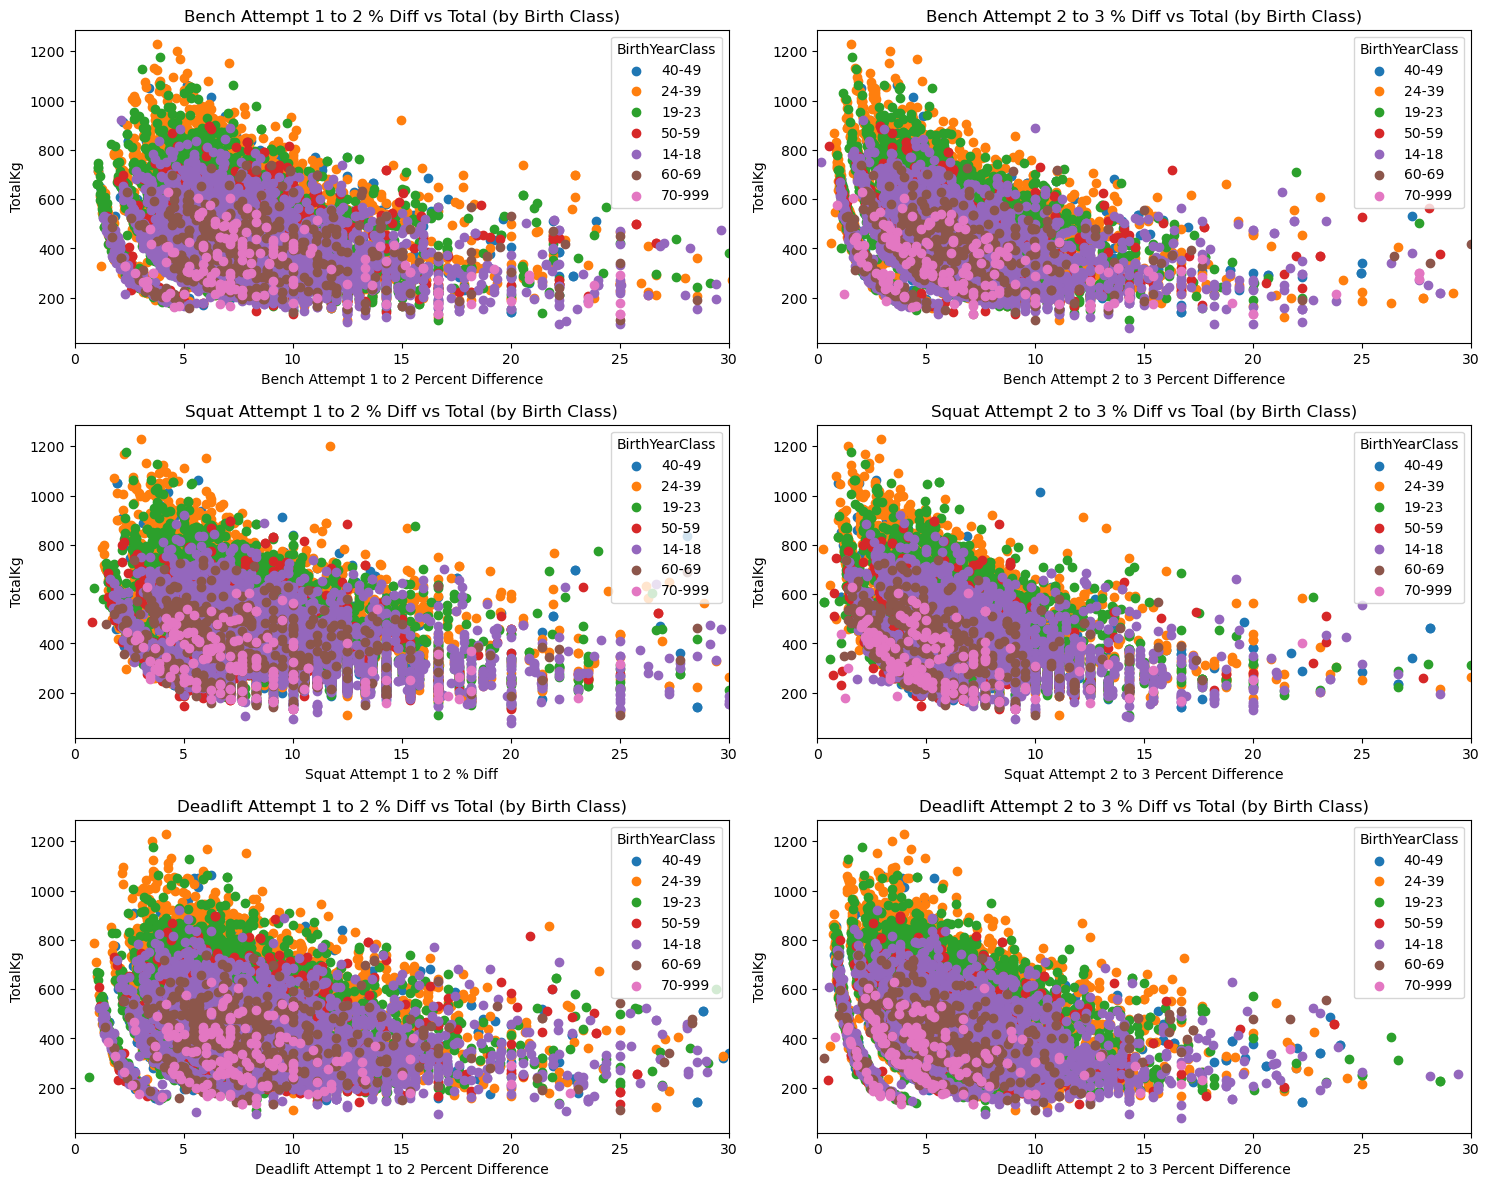

In [56]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,12))
fig.subplots_adjust(hspace=2)

for i, lift in enumerate(lifts):
    lift_diff_cols_for_lift = [col for col in lift_diff_cols if lift in col]
    for j, diff_col in enumerate(lift_diff_cols_for_lift):
        # Create a scatter plot of Total vs percent difference, split by birth year class
        ax = axs[i,j]
        for byc in df[byc_col].unique():
            mask = df[byc_col] == byc
            x = df.loc[mask, diff_col]
            y = df.loc[mask, total_col]
            ax.scatter(x, y, label=byc)
        ax.set_xlabel(x_titles[i*2+j])
        ax.set_ylabel(total_col)
        ax.set_title(titles[i*2+j])
        ax.set_xlim(0, 30)
        ax.set_xticks(range(0, 31, 5))
        ax.legend(title=byc_col, loc='upper right')
        
plt.tight_layout()
plt.show()

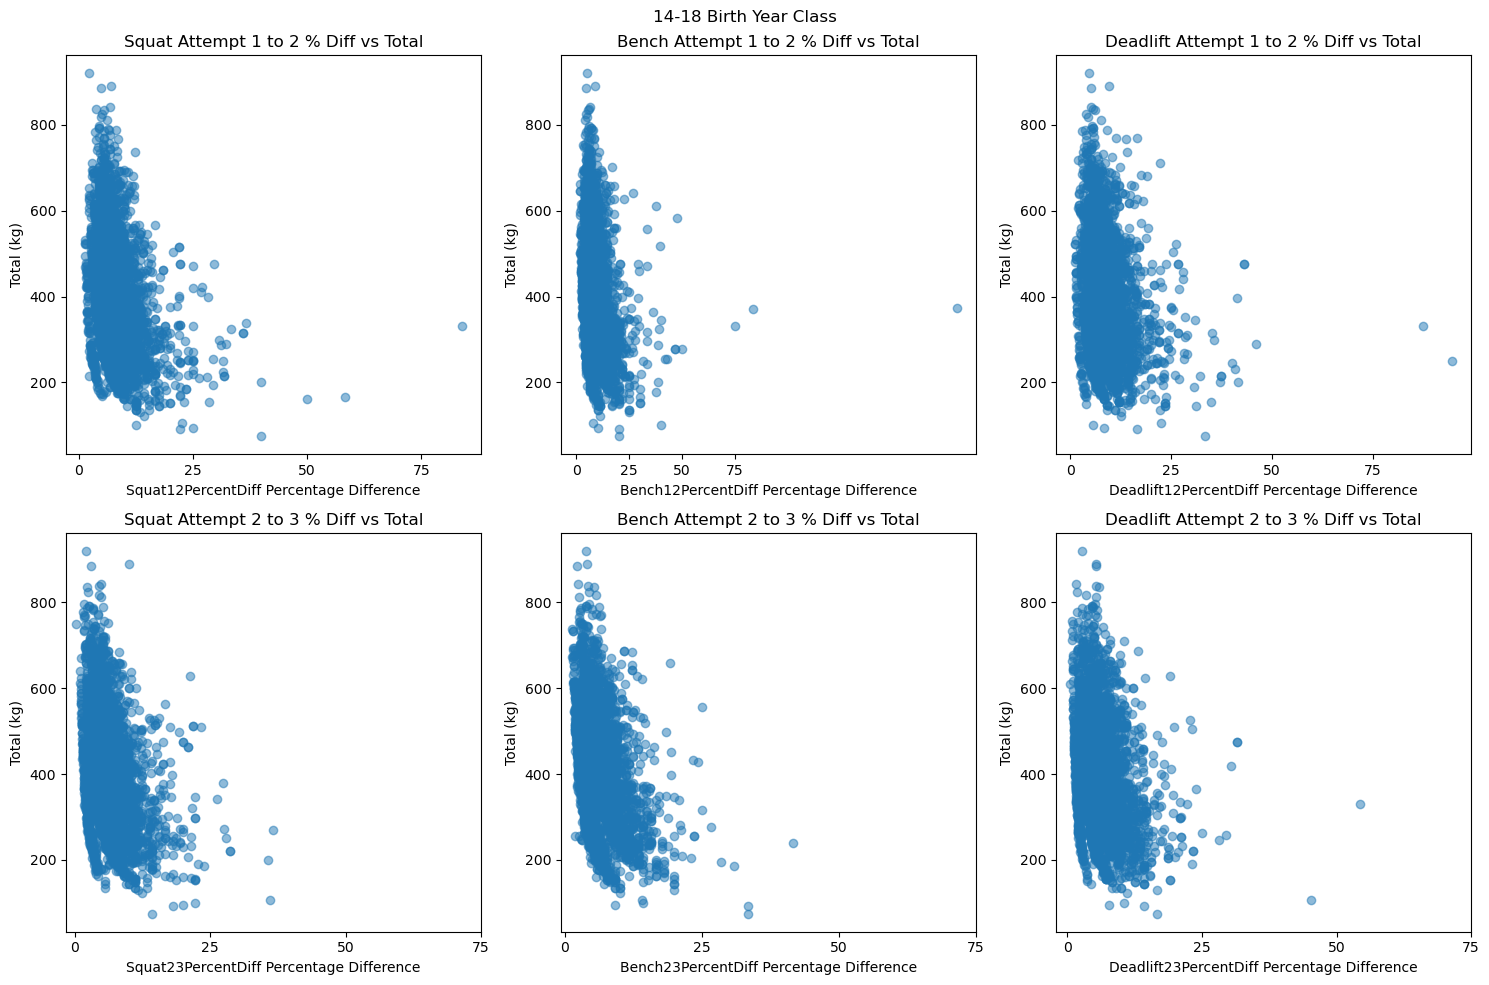

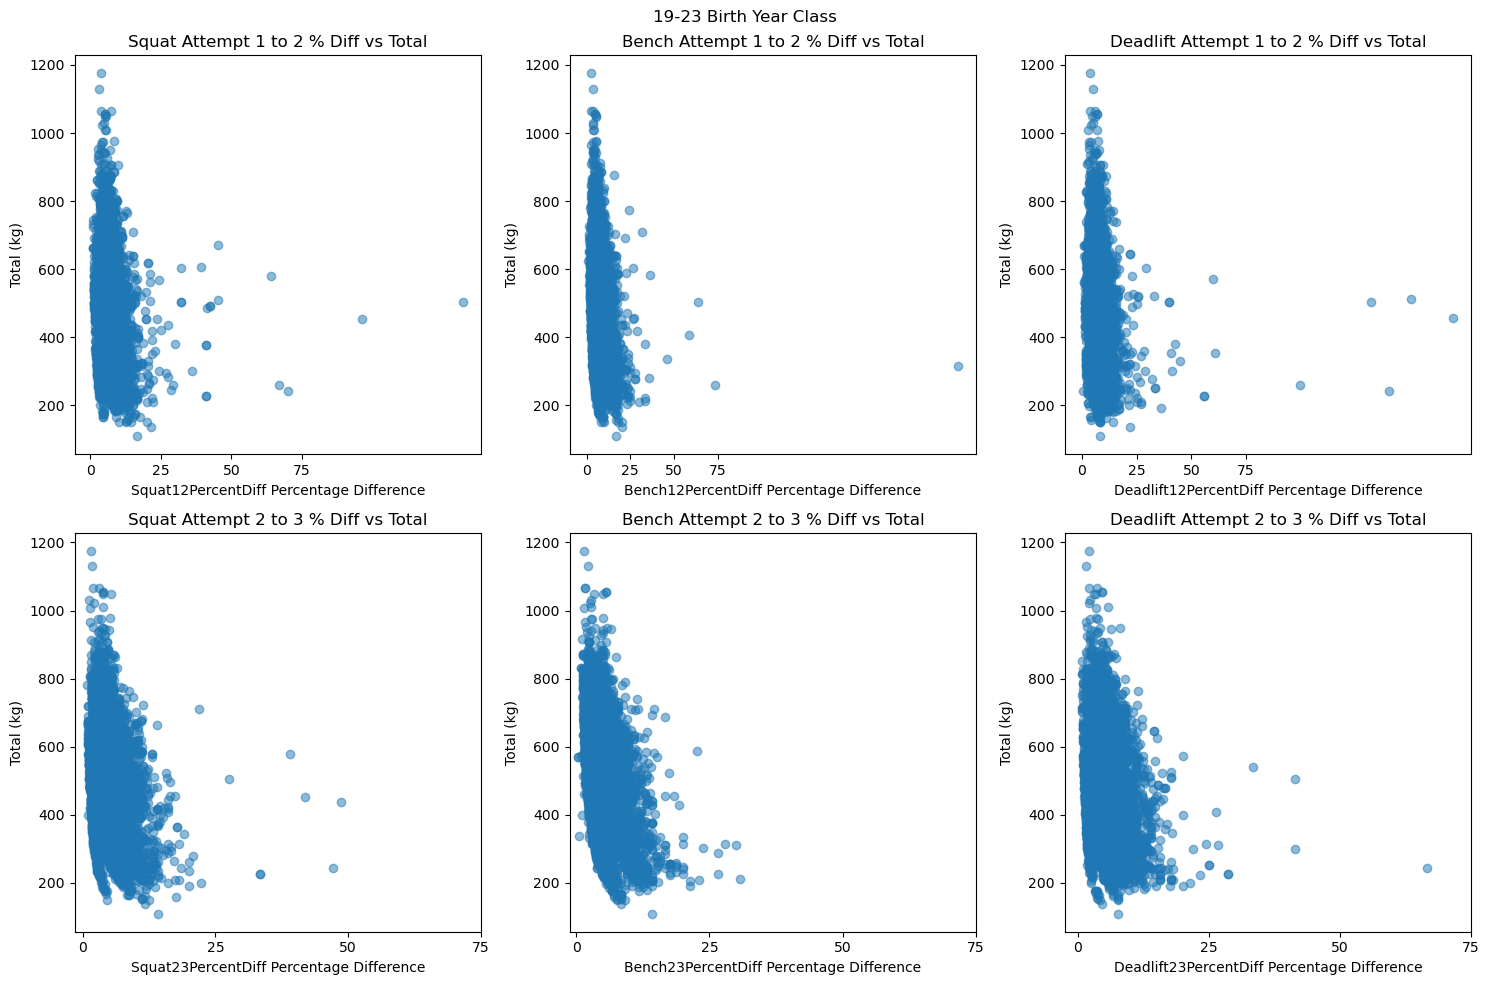

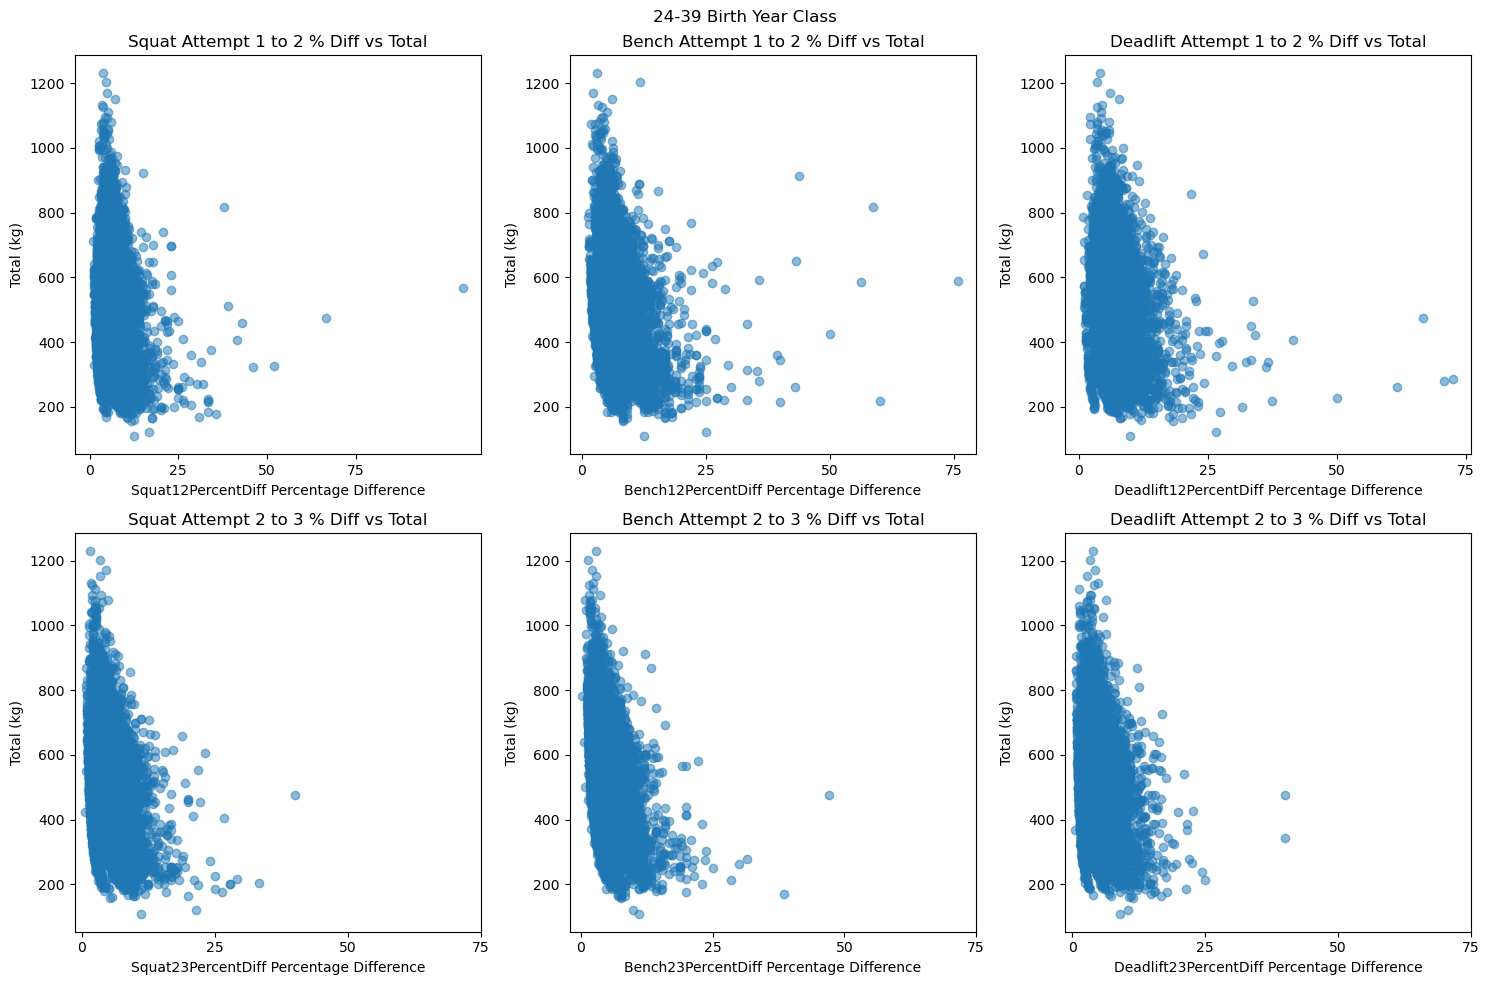

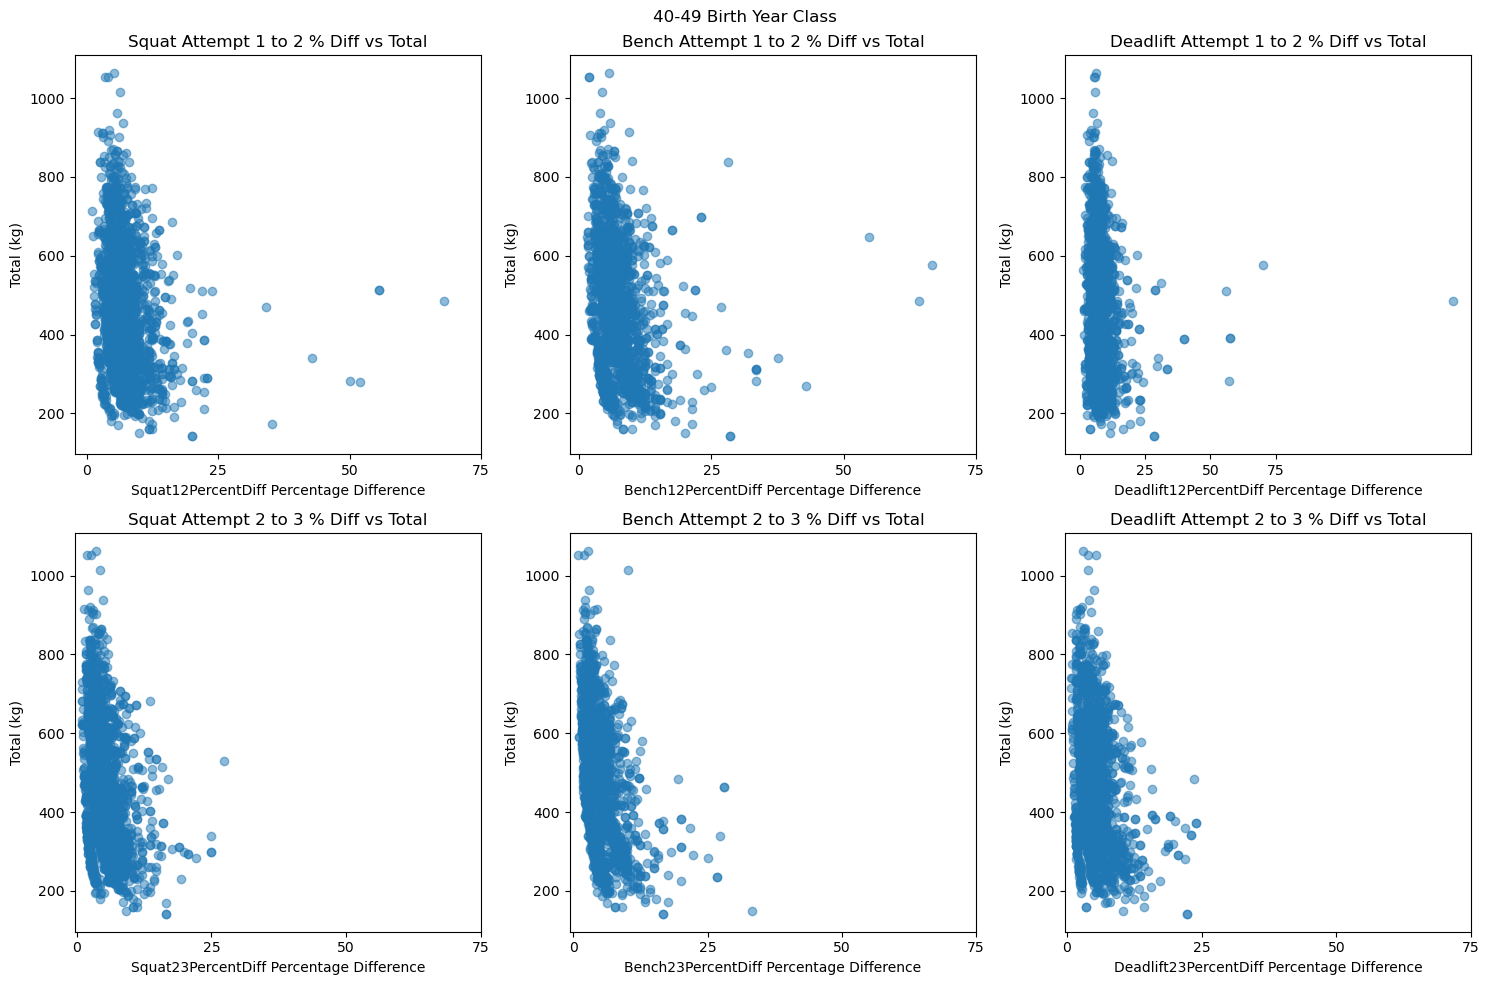

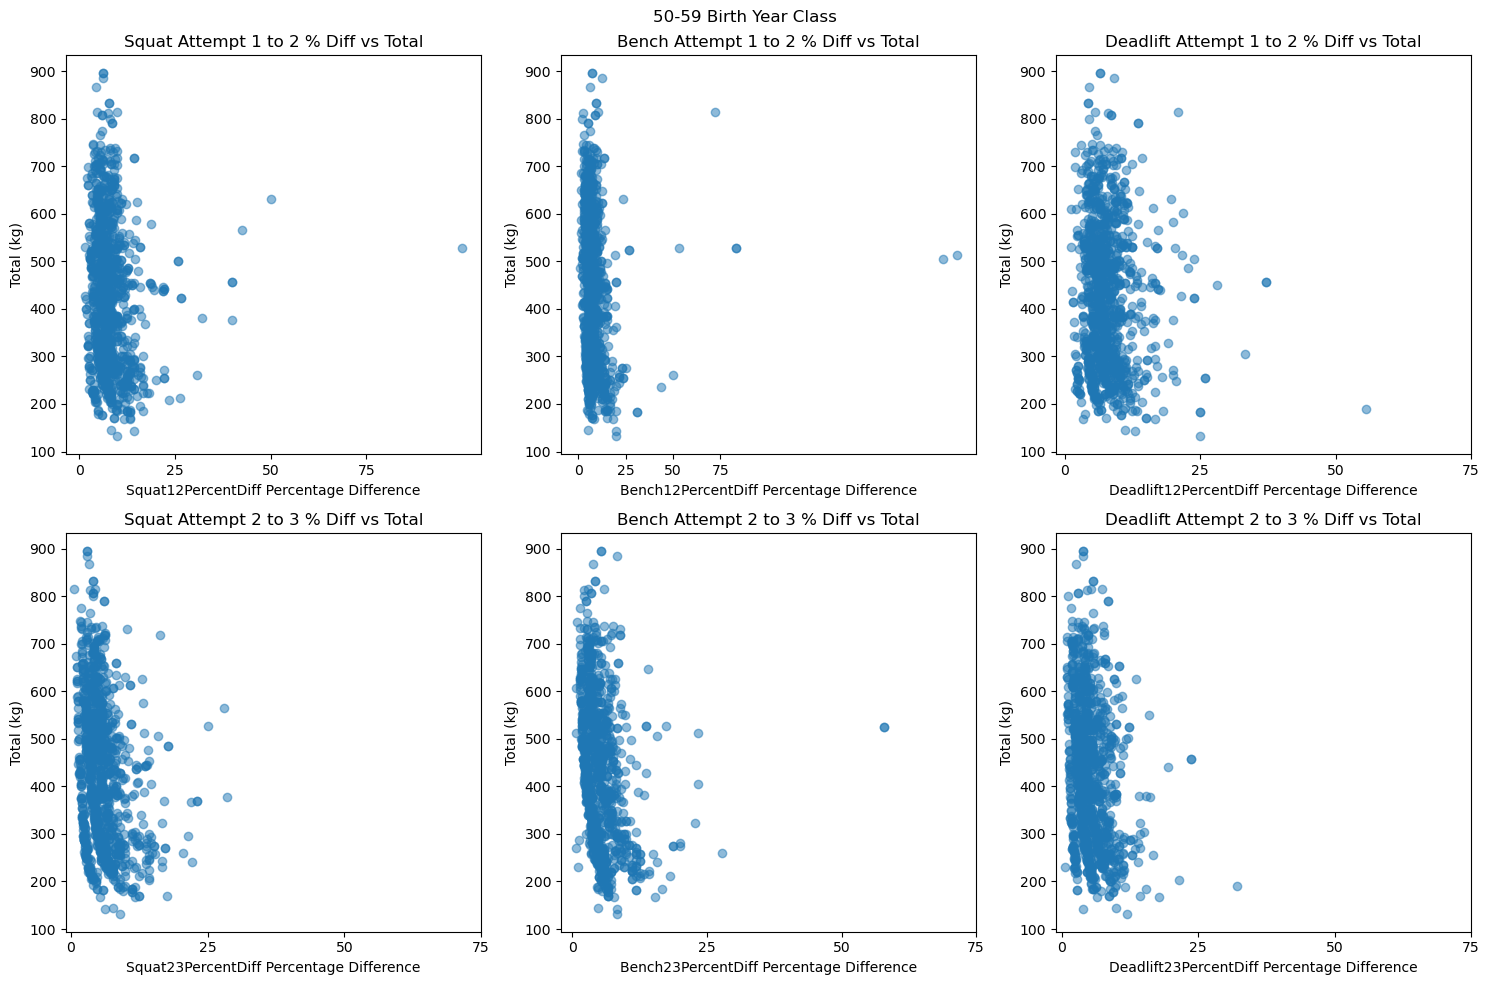

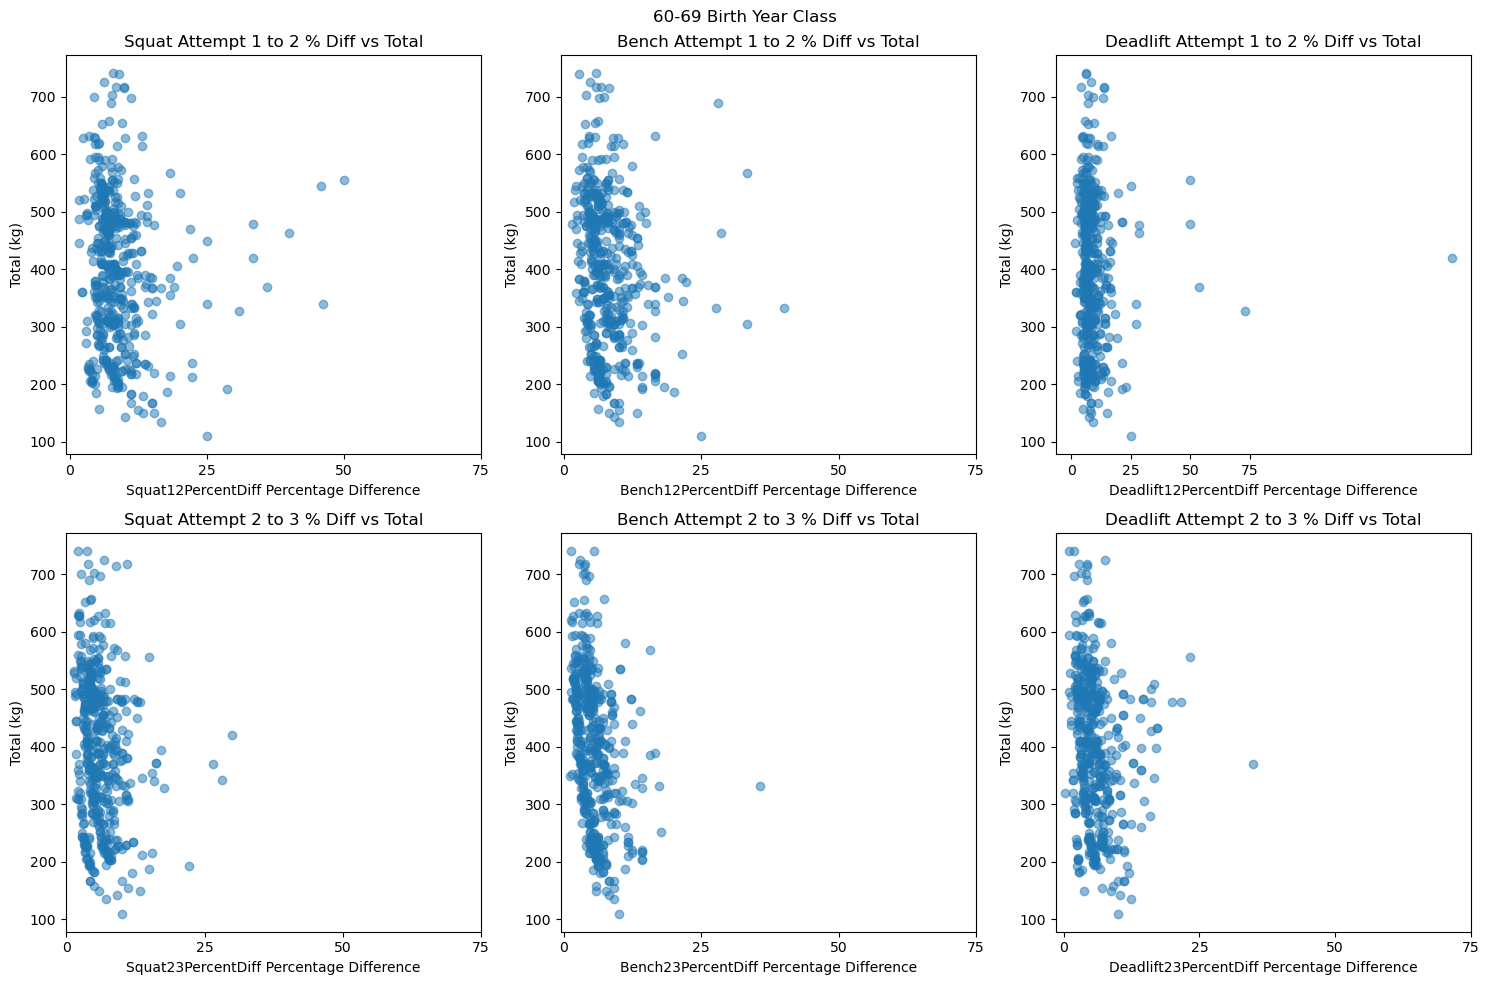

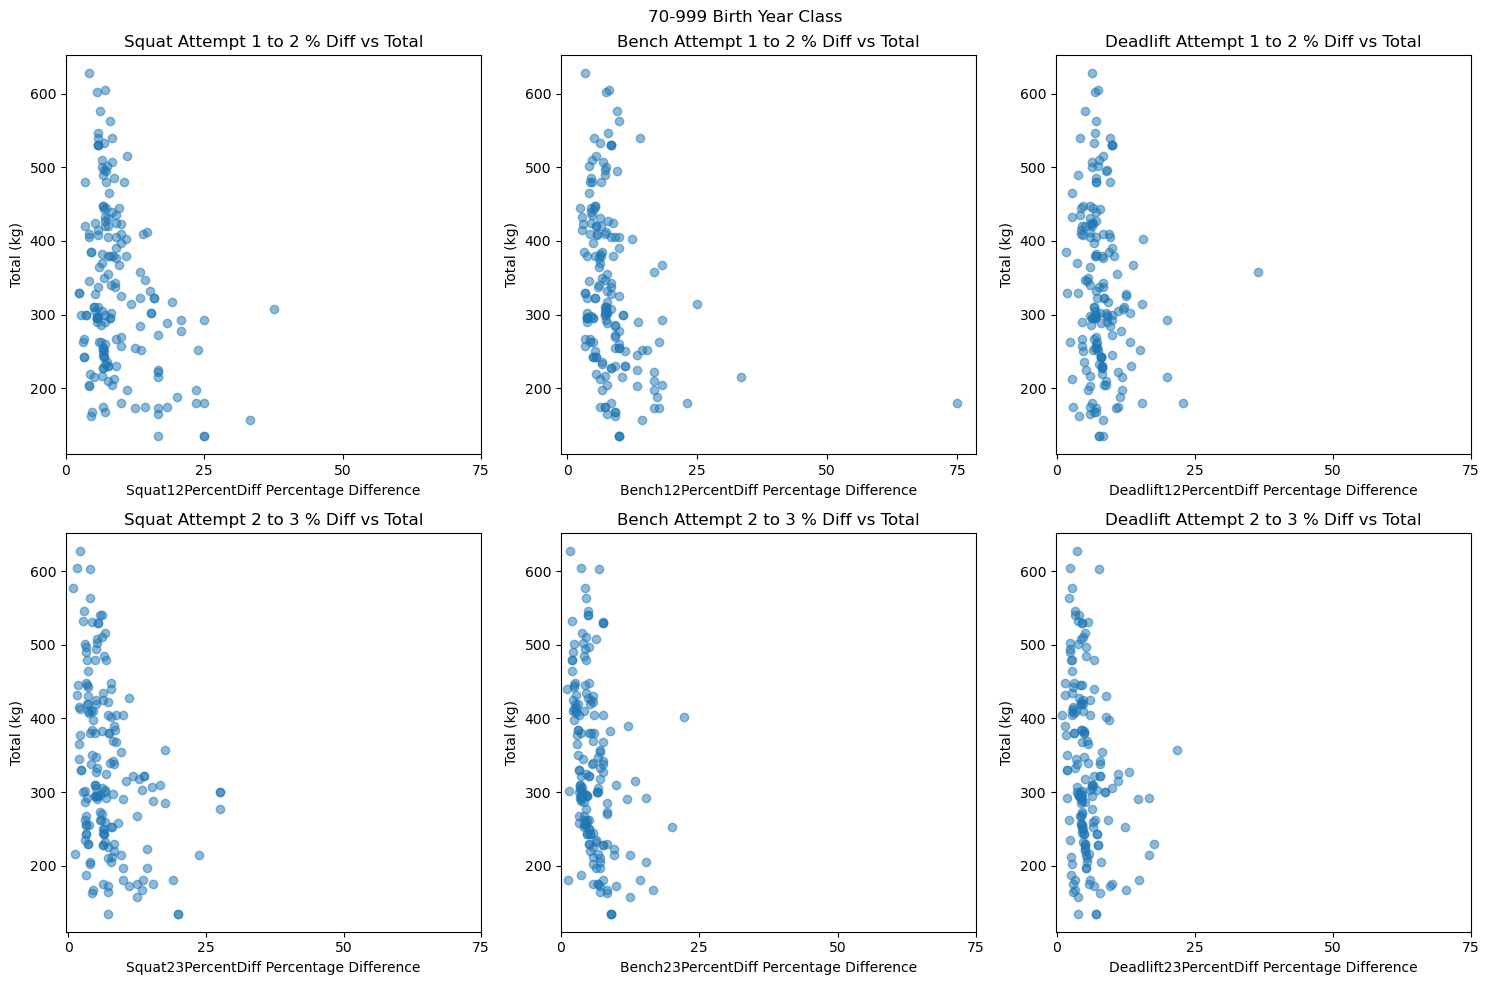

In [ ]:
# define the columns we want to plot
lift_cols = ["Squat12PercentDiff", "Bench12PercentDiff", "Deadlift12PercentDiff",
             "Squat23PercentDiff", "Bench23PercentDiff", "Deadlift23PercentDiff"]

# define the titles for each plot
titles = {"Squat12PercentDiff": "Squat Attempt 1 to 2 % Diff vs Total",
          "Bench12PercentDiff": "Bench Attempt 1 to 2 % Diff vs Total",
          "Deadlift12PercentDiff": "Deadlift Attempt 1 to 2 % Diff vs Total",
          "Squat23PercentDiff": "Squat Attempt 2 to 3 % Diff vs Total",
          "Bench23PercentDiff": "Bench Attempt 2 to 3 % Diff vs Total",
          "Deadlift23PercentDiff": "Deadlift Attempt 2 to 3 % Diff vs Total"}

# loop through each birth year class and generate a separate plot for each lift column
for by_class in df_ordered['BirthYearClass'].unique():
    # create a figure with six subplots (one for each lift column)
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=4)
    
    # loop through each lift column and plot the data
    for i, col in enumerate(lift_cols):
        row, col_idx = divmod(i, 3) # calculate the subplot row and column indices
        ax = axs[row, col_idx] # get the current subplot
        
        # filter the data for the current birth year class and lift column
        data = df.loc[(df["BirthYearClass"] == by_class), [col, "TotalKg"]]
        
        # plot the data as a scatter plot
        ax.scatter(data[col], data["TotalKg"], alpha=0.5)
        
        # set the title and axis labels
        ax.set_title(titles[col])
        ax.set_xlabel(f"{col} Percentage Difference")
        ax.set_ylabel("Total (kg)")
        ax.set_xticks(range(0, 100, 25))
        
    # set the overall title for the figure
    fig.suptitle(f"{by_class} Birth Year Class")
    
    # adjust the layout and save the figure
    plt.tight_layout()
    plt.show()

In [49]:
#new_df = df.drop(['Date','Glossbrenner', 'Dots', 'Place'], axis=1)

In [23]:
#new_df.to_csv('ML_data.csv', index=False)